In [ ]:
## lab-cleaning-numerical-data
## Lab | Basic Data Cleaning and EDA
## For this lab, we will be using the dataset in the Customer Analysis Business Case.

## Context:
    ## An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is and claim amounts. 
    ## You will help the senior management with some business questions that should help them to better understand their customers, improve their services and improve profitability.
    ## Some business Objectives for the case study could be:
        ## Retain customers,
        ## Analyze relevant customer data,
        ## Develop focused customer retention programs.
        ## Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

## Instructions:
    ## Import the necessary libraries.
    ## Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df (i.e. customer_df = pd.readcsv(""))
    ## First, look at its main features (head, shape, info).
    ## Rename the columns so they follow the PE8 (snake case).
    ## Fix the data types of any other column/columns as you might see necessary. Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. Hint: One thing you can try is to change date column to datetime format.
    ## Plot a correlation matrix, and comment on what you observe.
    ## Plot every continuous variable. Comment what you can see in the plots.
    ## Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). Comment what you can see in the plots. You should also delete the column customer_id before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column customer_id required. Hint: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.
    ## Look for outliers in the continuous variables. (Hint: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them.
    ## Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [2]:
## Import libraries

import pandas as pd
import datetime
from datetime import date
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression     
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [4]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

In [7]:
customer_df.shape

TypeError: 'tuple' object is not callable

In [8]:
customer_df.info()

## We can see the different data types of columns below. And it is also possible to understand that there are Nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [9]:
customer_df.describe()   ## This is a method in Pandas to provides a quick way to generate descriptive statistics on NUMERIC columns in a DataFrame

Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

In [15]:
customer_df.describe(include='all')  ## Describing all columns of a DataFrame regardless of data type.

Customer       State  Customer Lifetime Value Response Coverage  \
count      9134        9134              9134.000000     9134     9134   
unique     9134           5                      NaN        2        3   
top     BU79786  California                      NaN       No    Basic   
freq          1        3150                      NaN     7826     5568   
mean        NaN         NaN              8004.940475      NaN      NaN   
std         NaN         NaN              6870.967608      NaN      NaN   
min         NaN         NaN              1898.007675      NaN      NaN   
25%         NaN         NaN              3994.251794      NaN      NaN   
50%         NaN         NaN              5780.182197      NaN      NaN   
75%         NaN         NaN              8962.167041      NaN      NaN   
max         NaN         NaN             83325.381190      NaN      NaN   

       Education Effective To Date EmploymentStatus Gender        Income  ...  \
count       9134              9134             9134   9134   9134.000000  ...   
unique         5                59                5      2           NaN  ...   
top     Bachelor           1/10/11         Employed      F           NaN  ...   
freq        2748               195             5698   4658           NaN  ...   
mean         NaN               NaN              NaN    NaN  37657.380009  ...   
std          NaN               NaN              NaN    NaN  30379.904734  ...   
min          NaN               NaN              NaN    NaN      0.000000  ...   
25%          NaN               NaN              NaN    NaN      0.000000  ...   
50%          NaN               NaN              NaN    NaN  33889.500000  ...   
75%          NaN               NaN              NaN    NaN  62320.000000  ...   
max          NaN               NaN              NaN    NaN  99981.000000  ...   

       Months Since Policy Inception Number of Open Complaints  \
count                    9134.000000               9134.000000   
unique                           NaN                       NaN   
top                              NaN                       NaN   
freq                             NaN                       NaN   
mean                       48.064594                  0.384388   
std                        27.905991                  0.910384   
min                         0.000000                  0.000000   
25%                        24.000000                  0.000000   
50%                        48.000000                  0.000000   
75%                        71.000000                  0.000000   
max                        99.000000                  5.000000   

        Number of Policies    Policy Type       Policy  Renew Offer Type  \
count          9134.000000           9134         9134              9134   
unique                 NaN              3            9                 4   
top                    NaN  Personal Auto  Personal L3            Offer1   
freq                   NaN           6788         3426              3752   
mean              2.966170            NaN          NaN               NaN   
std               2.390182            NaN          NaN               NaN   
min               1.000000            NaN          NaN               NaN   
25%               1.000000            NaN          NaN               NaN   
50%               2.000000            NaN          NaN               NaN   
75%               4.000000            NaN          NaN               NaN   
max               9.000000            NaN          NaN               NaN   

        Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
count            9134        9134.000000           9134         9134  
unique              4                NaN              6            3  
top             Agent                NaN  Four-Door Car      Medsize  
freq             3477                NaN           4621         6424  
mean              NaN         434.088794            NaN          NaN  
std          

In [13]:
customer_df.isnull().sum()   ## Check and deal with NaN values

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [19]:
## #Rename the columns so they follow the PE8 (snake case)
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')

In [20]:
customer_df.columns     ## Display the new column names to confirm the change

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [22]:
customer_df = customer_df.rename(columns={'employmentstatus': 'employment_status'})
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [23]:
## Changing the 'effective_to_date' column to datetime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])   

C:\Users\rainm\AppData\Local\Temp\ipykernel_20900\791879803.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


In [24]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employment_status              9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [25]:
## Confirming the change by displaying the datatype of each column
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [28]:
## Plot a correlation matrix
customer_df.corr(numeric_only=True)

customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.024366   
income                                        0.024366  1.000000   
monthly_premium_auto                          0.396262 -0.016665   
months_since_last_claim                       0.011517 -0.026715   
months_since_policy_inception                 0.009418 -0.000875   
number_of_open_complaints                    -0.036343  0.006408   
number_of_policies                            0.021955 -0.008656   
total_claim_amount                            0.226451 -0.355254   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.396262                 0.011517   
income                                    -0.016665                -0.026715   
monthly_premium_auto                       1.000000                 0.005026   
months_since_last_claim                    0.005026                 1.000000   
months_since_policy_inception              0.020257                -0.042959   
number_of_open_complaints                 -0.013122                 0.005354   
number_of_policies                        -0.011233                 0.009136   
total_claim_amount                         0.632017                 0.007563   

                               months_since_policy_inception  \
customer_lifetime_value                             0.009418   
income                                             -0.000875   
monthly_premium_auto                                0.020257   
months_since_last_claim                            -0.042959   
months_since_policy_inception                       1.000000   
number_of_open_complaints                          -0.001158   
number_of_policies                                 -0.013333   
total_claim_amount                                  0.003335   

                               number_of_open_complaints  number_of_policies  \
customer_lifetime_value                        -0.036343            0.021955   
income                                          0.006408           -0.008656   
monthly_premium_auto                           -0.013122           -0.011233   
months_since_last_claim                         0.005354            0.009136   
months_since_policy_inception                  -0.001158           -0.013333   
number_of_open_complaints                       1.000000            0.001498   
number_of_policies                              0.001498            1.000000   
total_claim_amount                             -0.014241           -0.002354   

                               total_claim_amount  
customer_lifetime_value                  0.226451  
income                                  -0.355254  
monthly_premium_auto                     0.632017  
months_since_last_claim                  0.007563  
months_since_policy_inception            0.003335  
number_of_open_complaints               -0.014241  
number_of_policies                      -0.002354  
total_claim_amount                       1.000000

<Axes: >

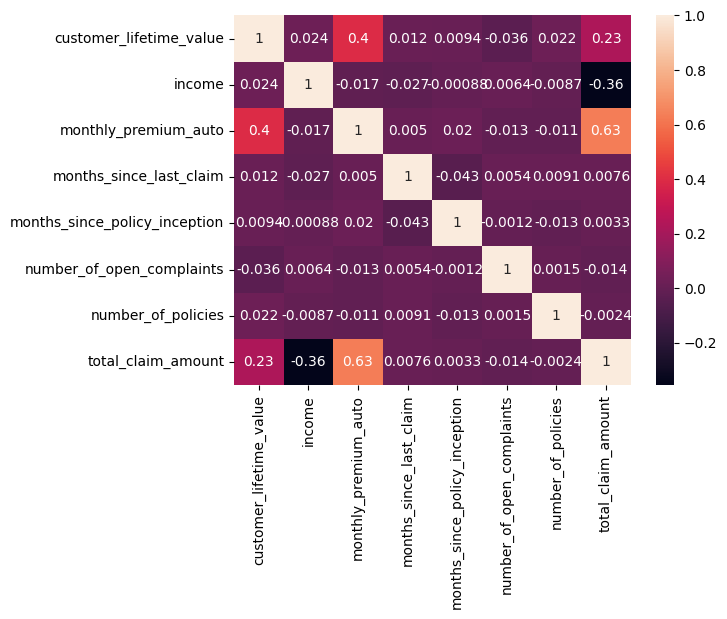

In [30]:
## Multicollinearity in regression analysis refers to a situation where two or more predictor variables in a model are highly correlated, meaning they provide redundant information about the response variable. 

correlations_matrix= customer_df.corr(numeric_only=True)
sns.heatmap(correlations_matrix, annot=True)

## We can assess from the heatmap below that there are not high features correlated.
## "monthly_premium_auto" and "cusotmer_lifetime_value" has moderate positive correlation (0.40), indicating as customerlifetime value increases, so does the monthly premium auto. This could suggests that customers who are valued higher potentially buy more premium policies.
## "total_clian_amount" and "monthly_premium_auto" have strong positive correlation (0.63), which is logical since higher premiums often lead to higher claim amounts, possibly reflecting higher coverage.
## For the cases with a very low positive correlation, they imply almost no direct relationship between teh variables.

In [31]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [34]:
non_object_columns = customer_df.select_dtypes(exclude=['object'])
print(non_object_columns)

      customer_lifetime_value effective_to_date  income  monthly_premium_auto  \
0                 2763.519279        2011-02-24   56274                    69   
1                 6979.535903        2011-01-31       0                    94   
2                12887.431650        2011-02-19   48767                   108   
3                 7645.861827        2011-01-20       0                   106   
4                 2813.692575        2011-02-03   43836                    73   
...                       ...               ...     ...                   ...   
9129             23405.987980        2011-02-10   71941                    73   
9130              3096.511217        2011-02-12   21604                    79   
9131              8163.890428        2011-02-06       0                    85   
9132              7524.442436        2011-02-03   21941                    96   
9133              2611.836866        2011-02-14       0                    77   

      months_since_last_cla

In [35]:
## Identifying continuous variables for plotting
continuous_variables = customer_df.select_dtypes(include=['float64', 'int64']).columns

## Or we can exclude the object columns in order to know the continuous vatiables with the following code: customer_df.select_dtypes(exclude=['object']) 

In [69]:
continuous_variables 

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

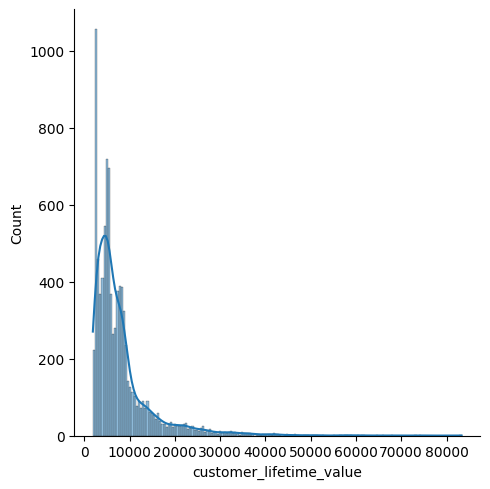

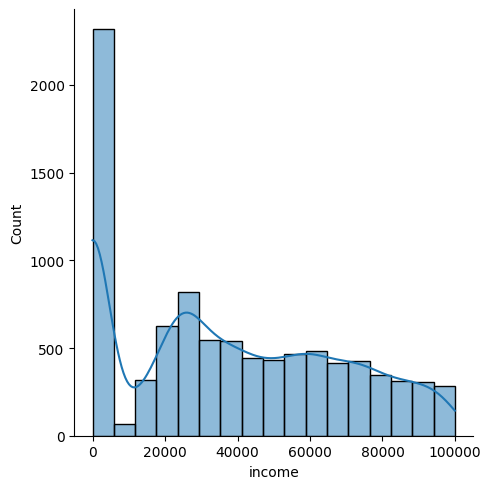

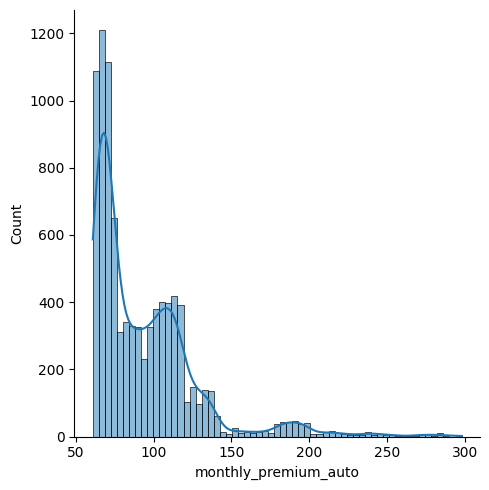

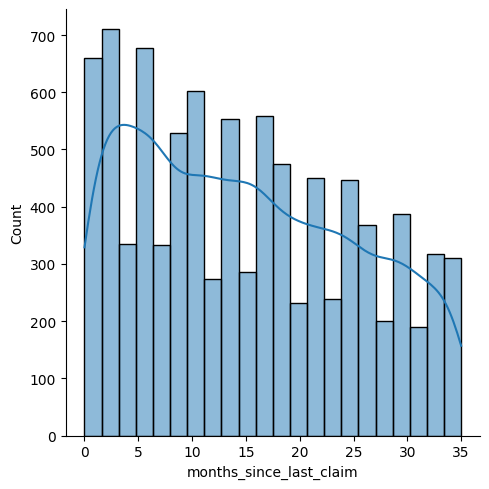

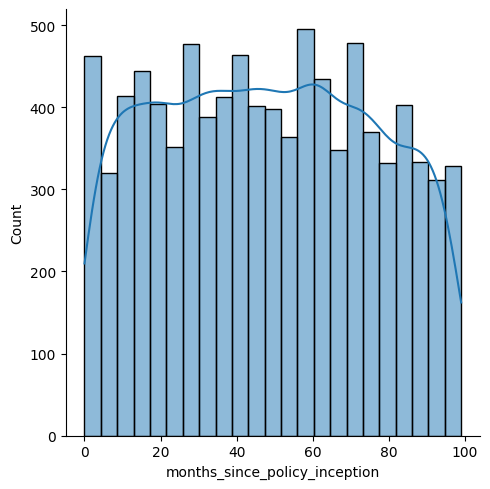

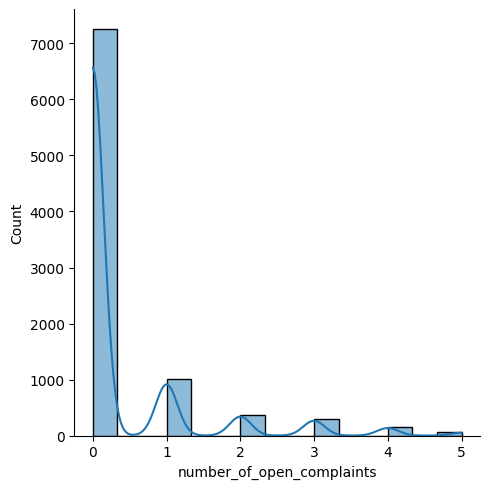

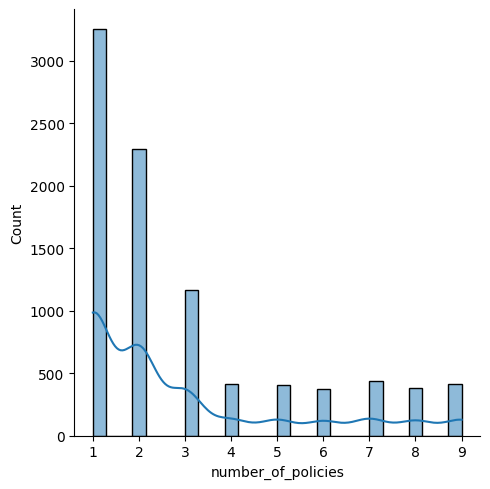

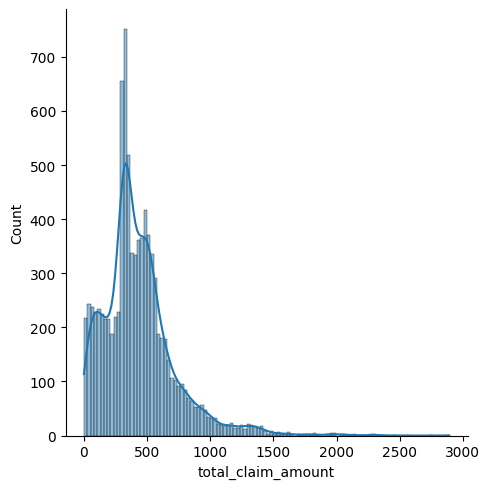

In [39]:
for col in continuous_variables: 
    sns.displot(customer_df[col],  kde=True)

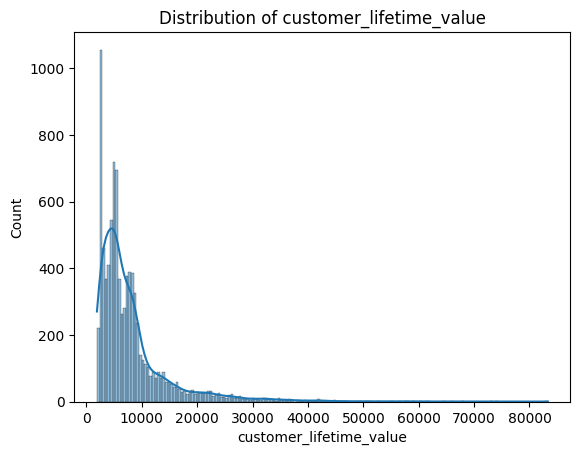

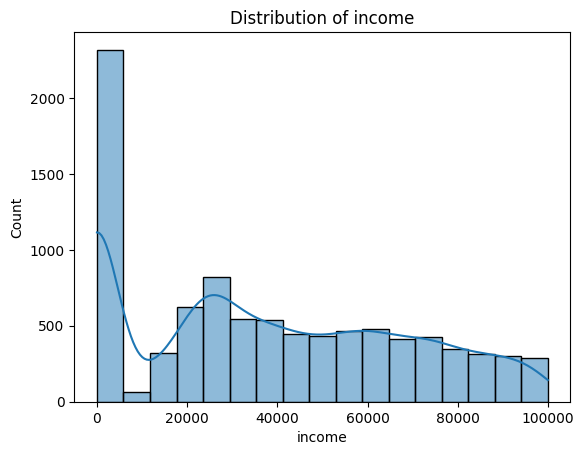

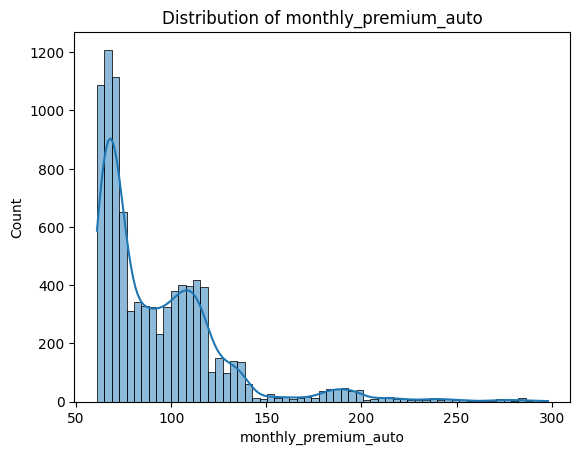

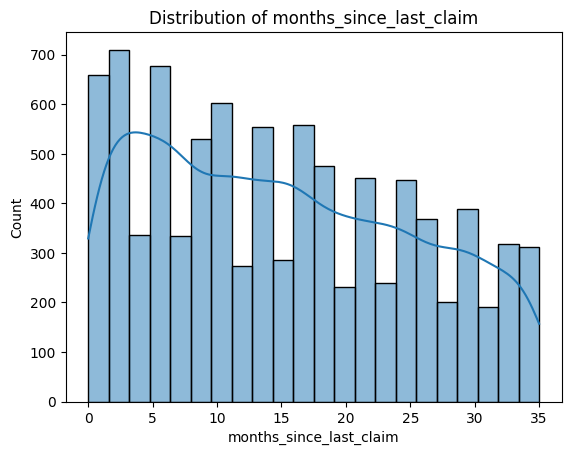

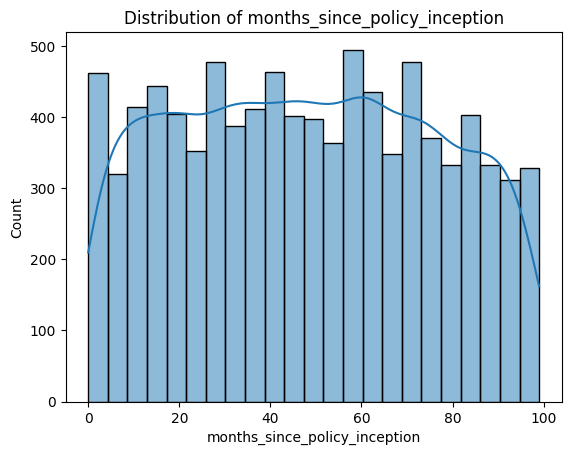

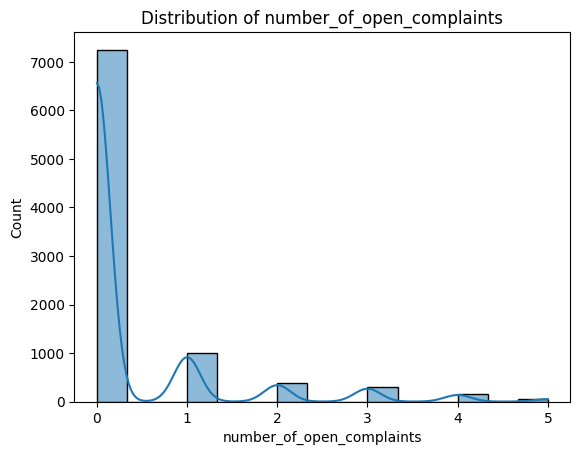

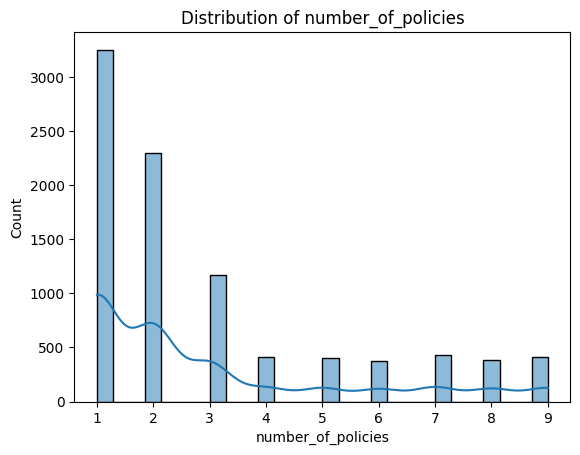

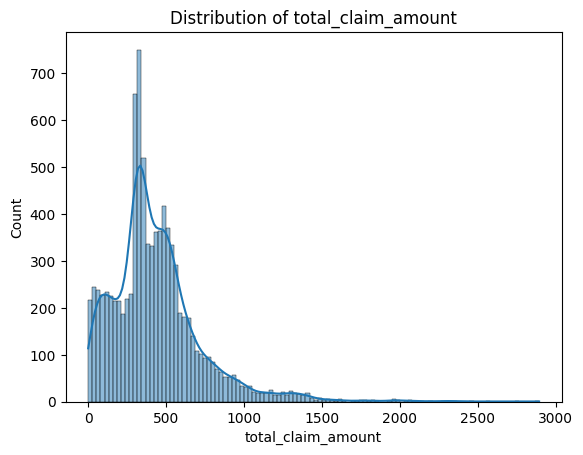

In [50]:
for col in continuous_variables:
    sns.histplot(customer_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
for col in continuous_variables:
    sns.histplot(customer_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

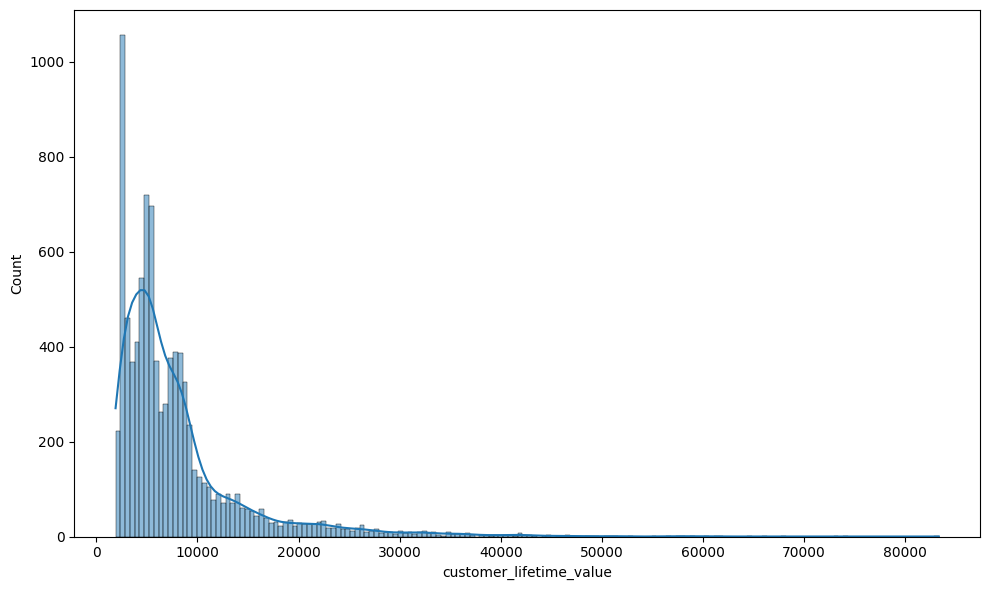

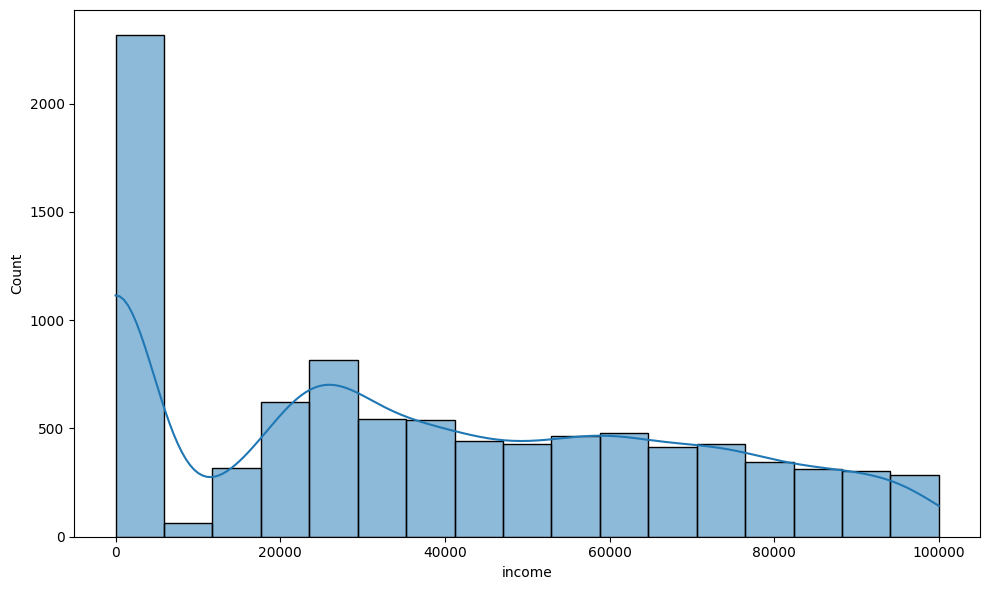

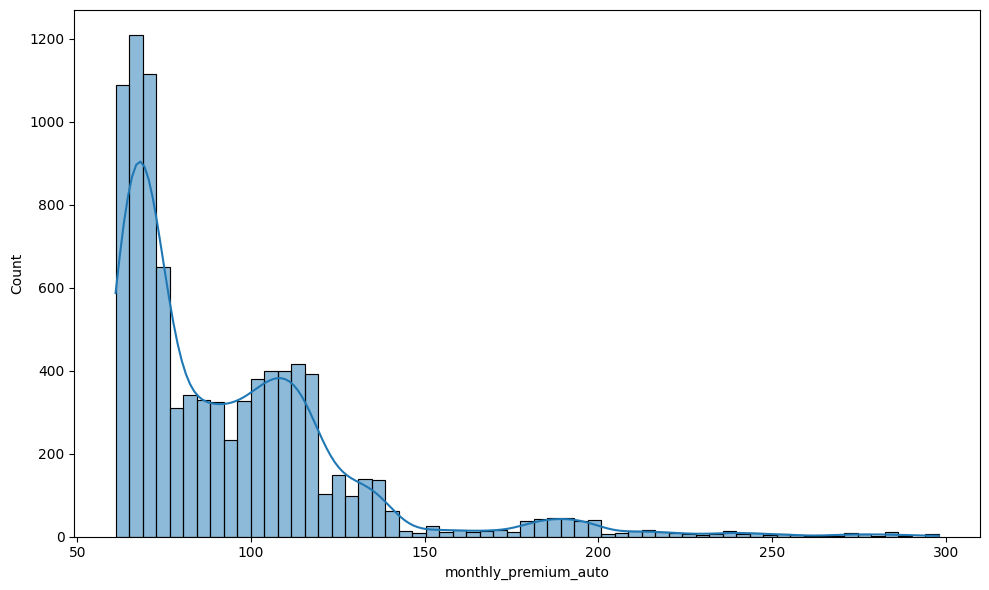

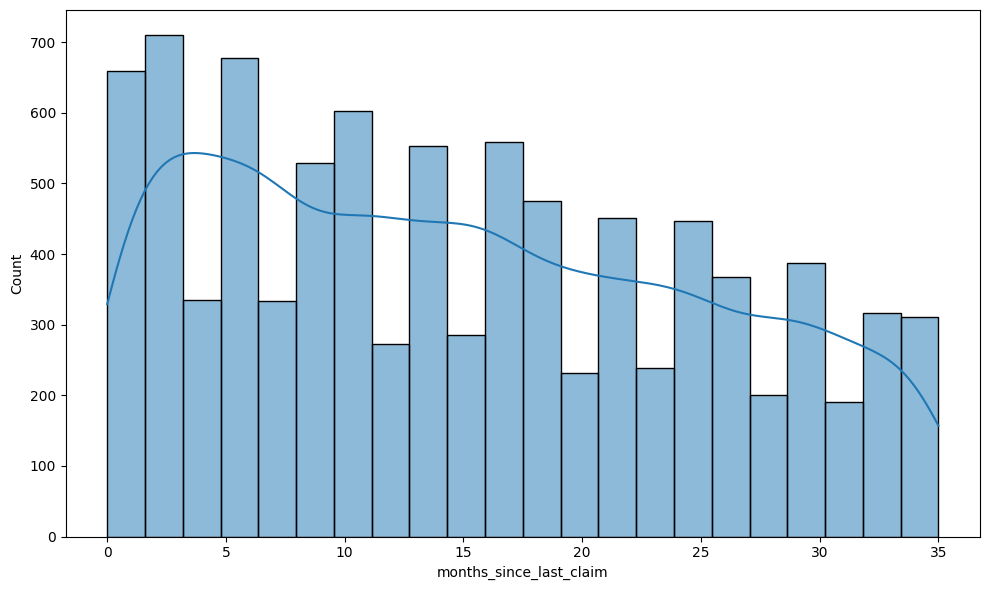

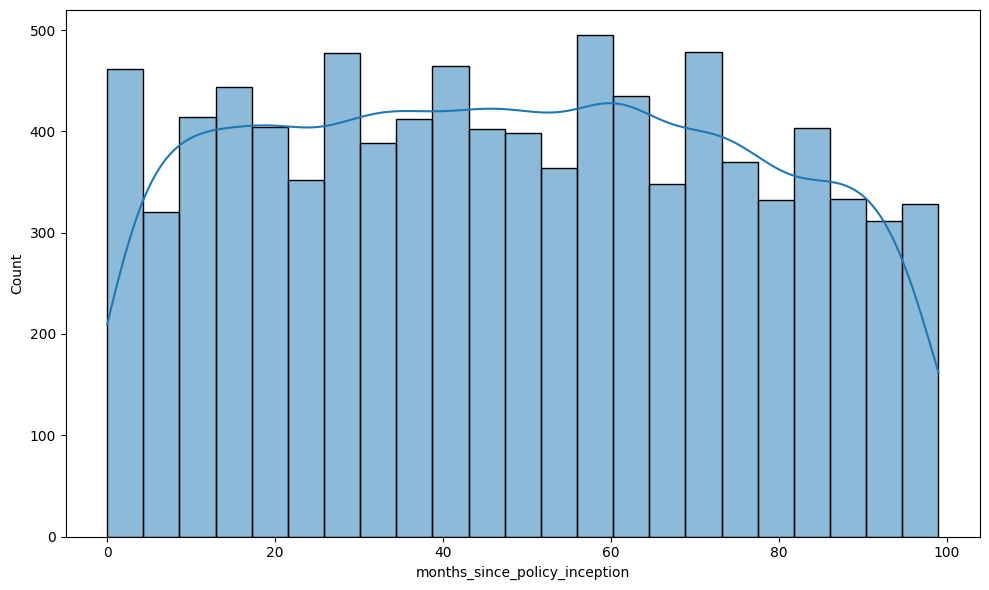

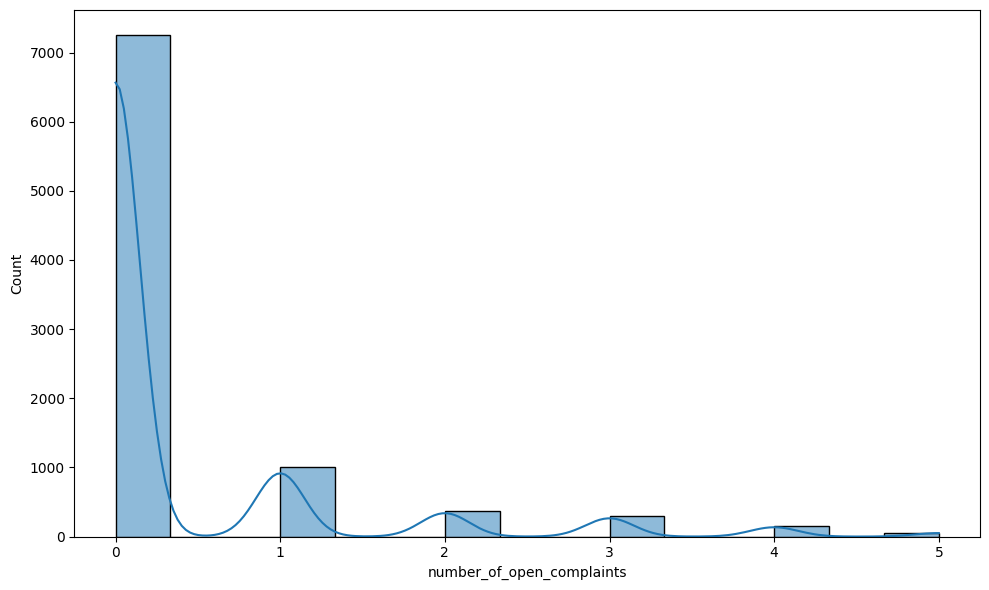

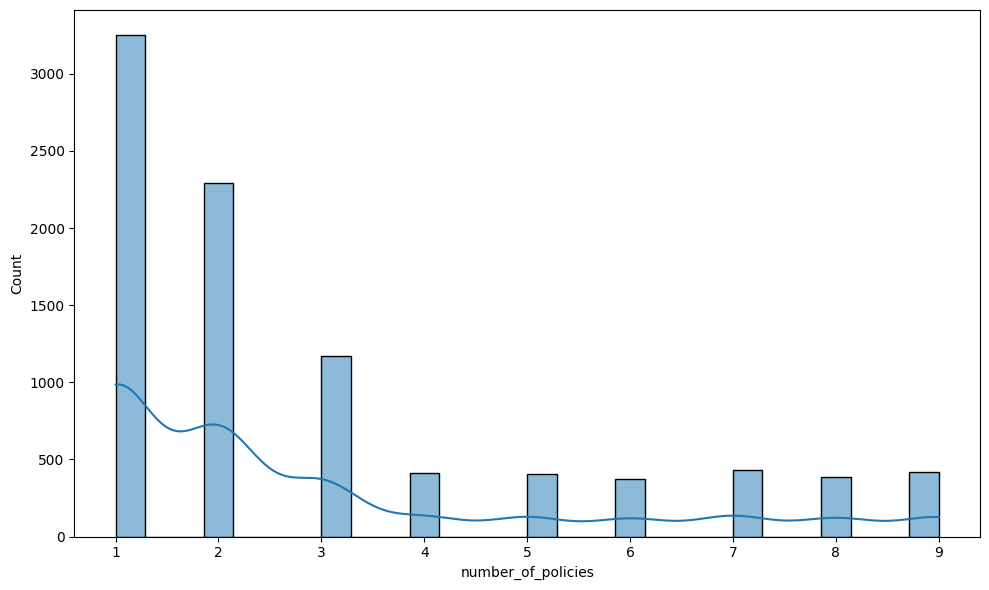

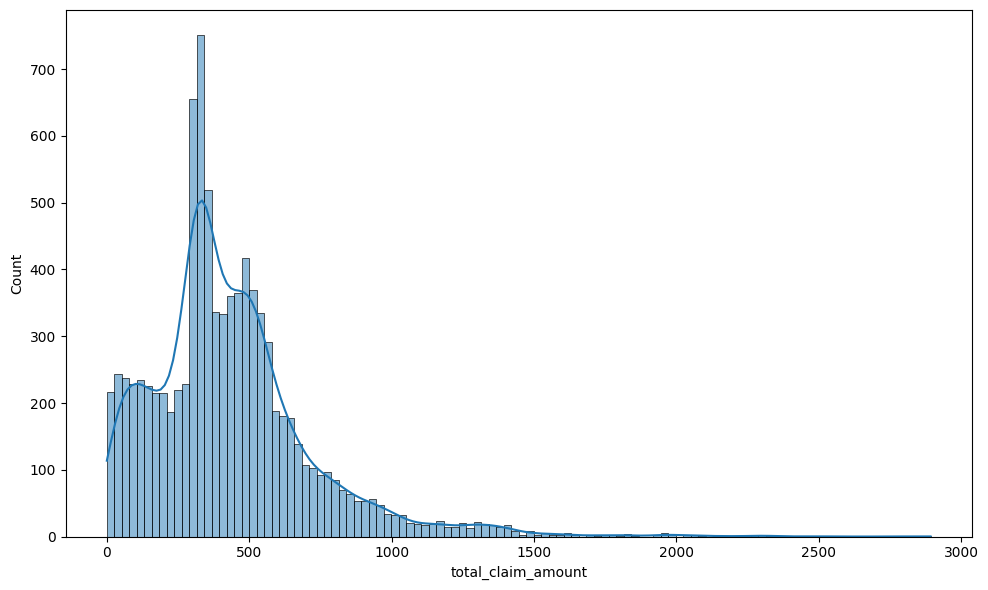

In [52]:
for col in continuous_variables:
    plt.figure(figsize=(10, 6))  ## Optional: to adjust the figure size
    sns.histplot(customer_df[col], kde=True)
    plt.tight_layout()
    plt.show()

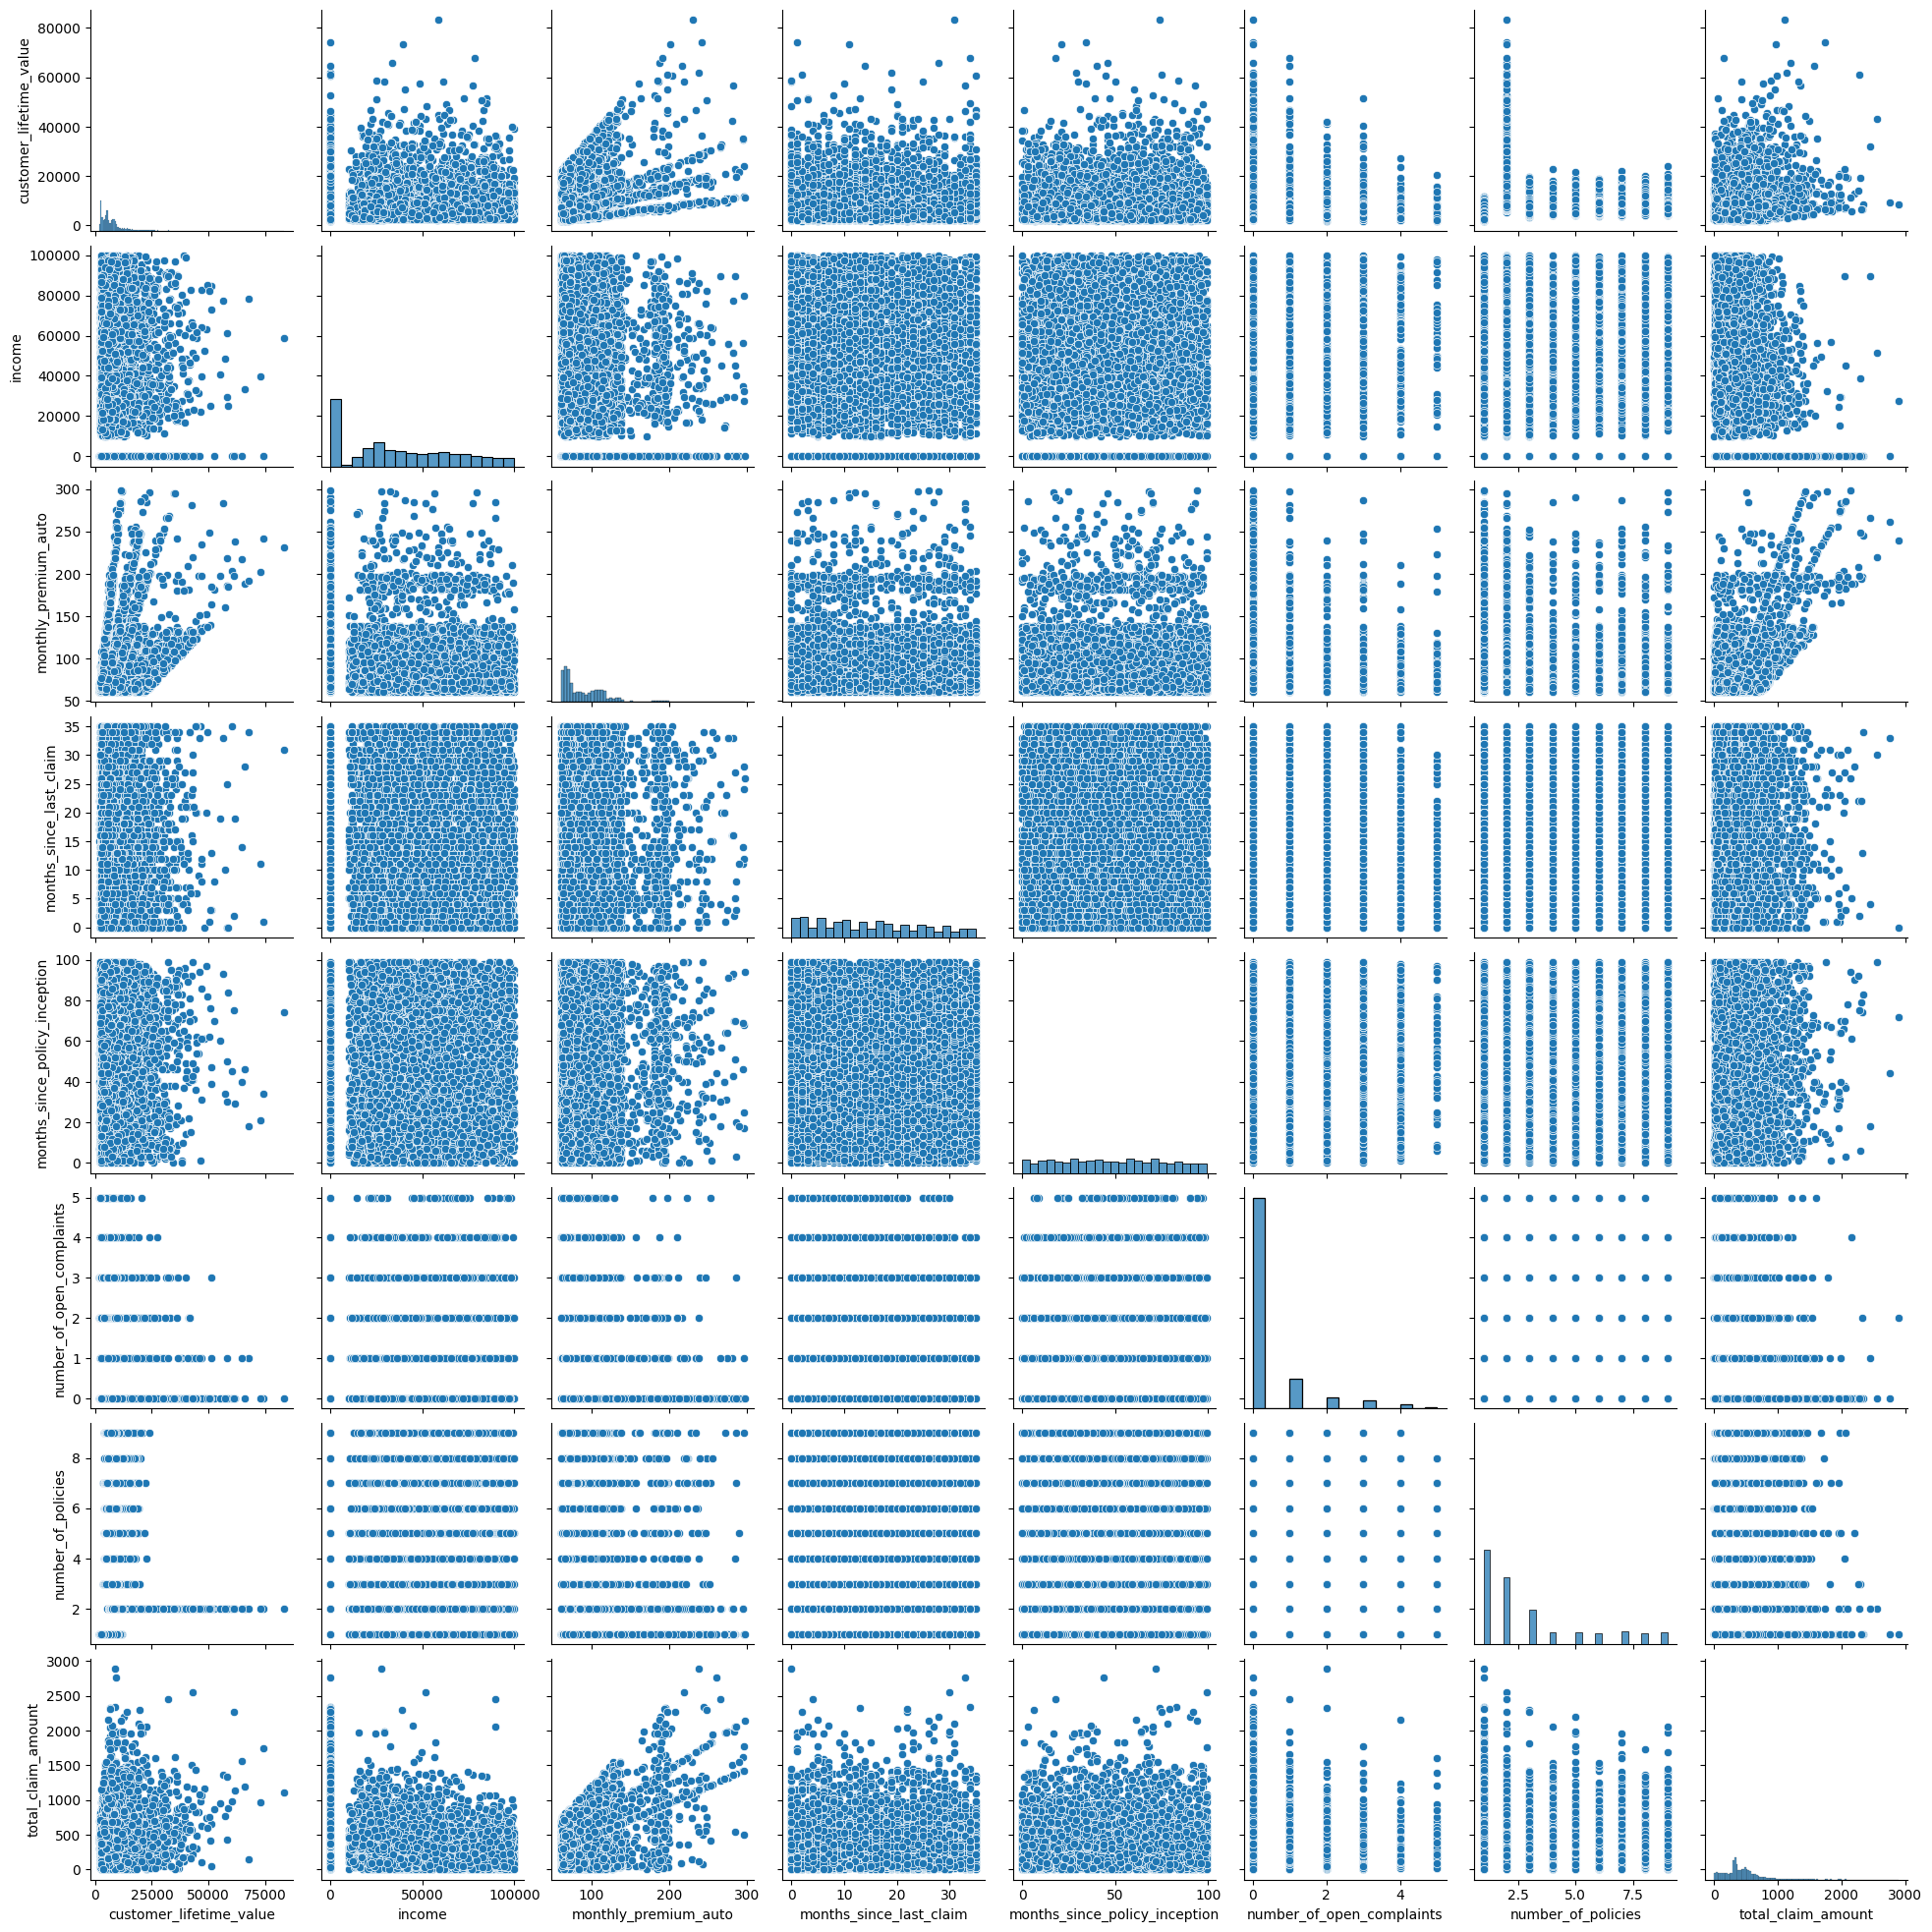

In [43]:
sns.pairplot(customer_df)
plt.show()

In [53]:
customer_df.head()


customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employment_status gender  income  ...  \
0        2011-02-24          Employed      F   56274  ...   
1        2011-01-31        Unemployed      F       0  ...   
2        2011-02-19          Employed      F   48767  ...   
3        2011-01-20        Unemployed      M       0  ...   
4        2011-02-03          Employed      M   43836  ...   

  months_since_policy_inception number_of_open_complaints  number_of_policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      policy_type        policy  renew_offer_type  sales_channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  total_claim_amount  vehicle_class vehicle_size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

In [ ]:
Categorical Variables Plotting:

In [54]:
# Dropping the 'customer' column as it's a unique identifier for each row and not relevant for categorical data analysis
customer_df = customer_df.drop('customer', axis=1)


In [57]:
# Identifying categorical variables for plotting (e.g. bar plots to plot categorical data)
categorical_variables = customer_df.select_dtypes(include=['object', 'datetime64[ns]']).columns

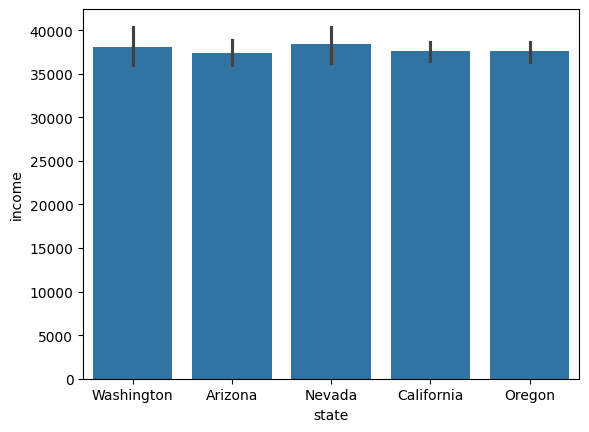

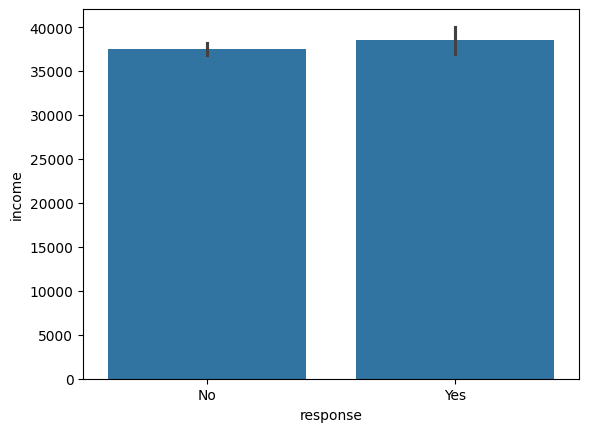

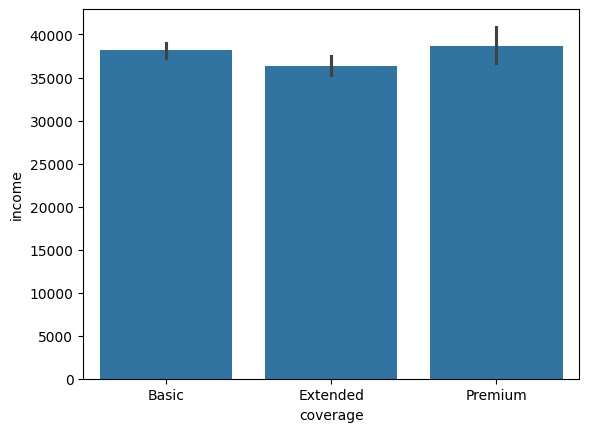

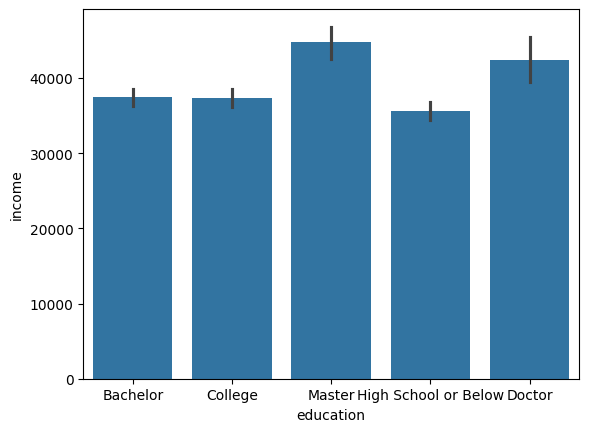

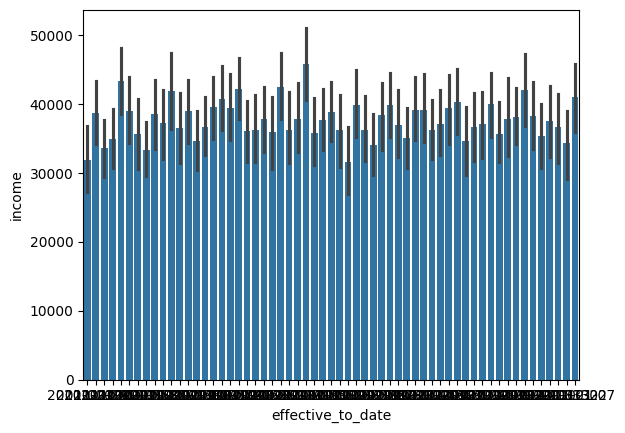

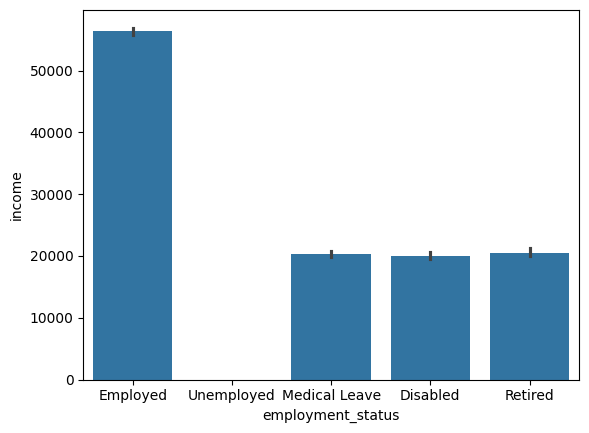

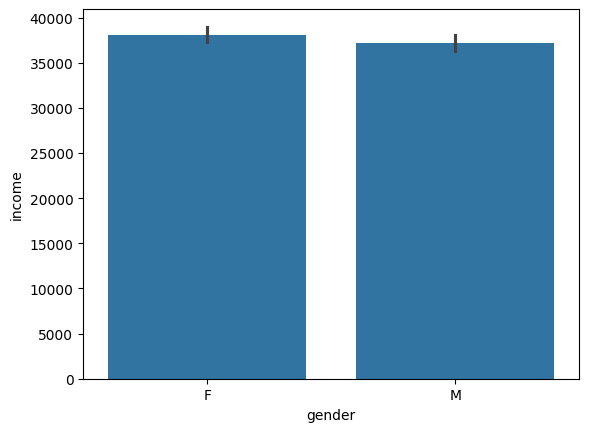

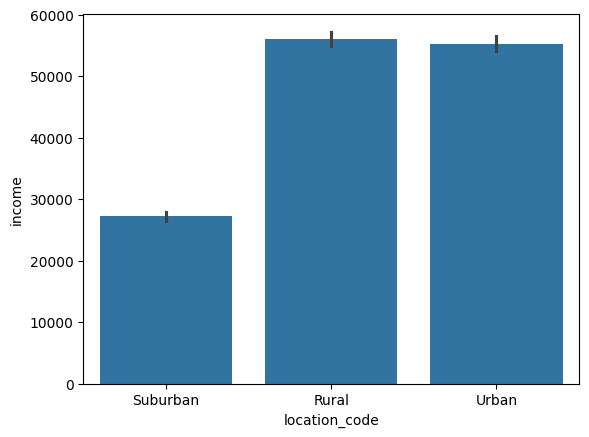

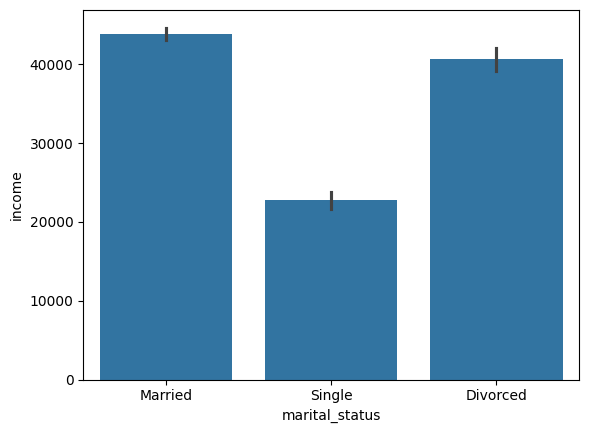

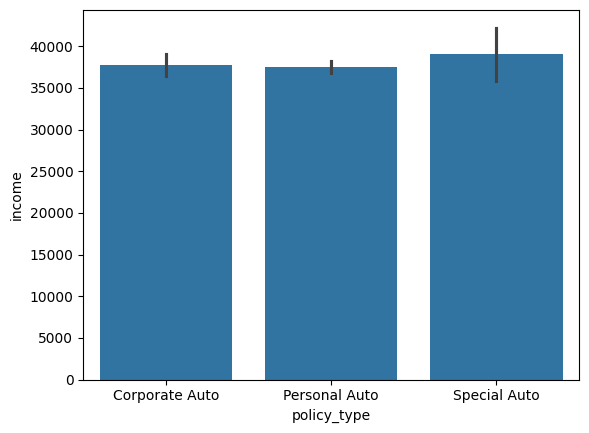

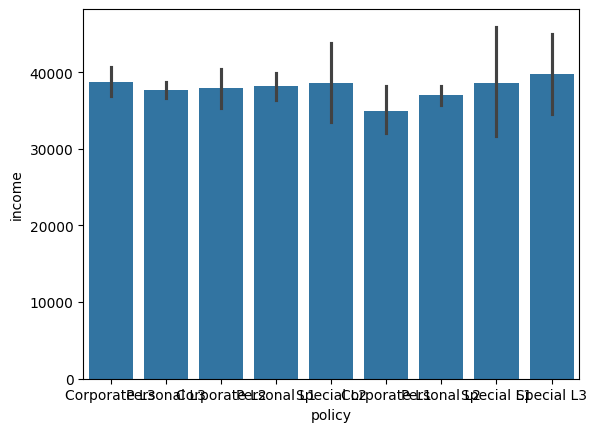

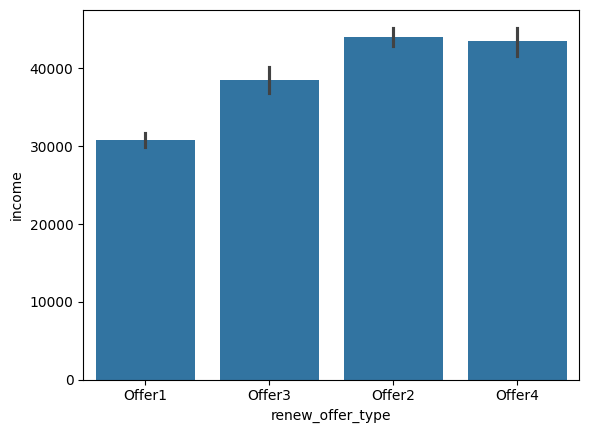

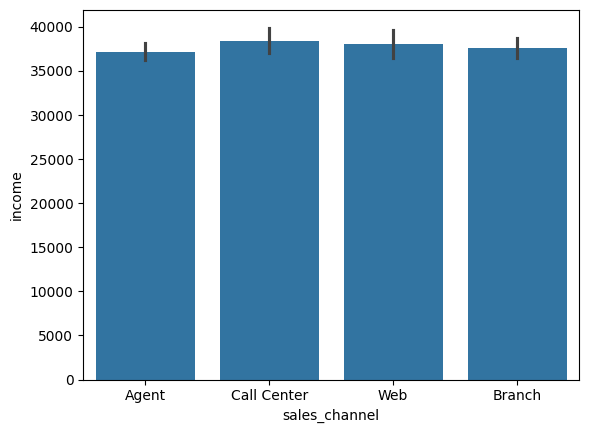

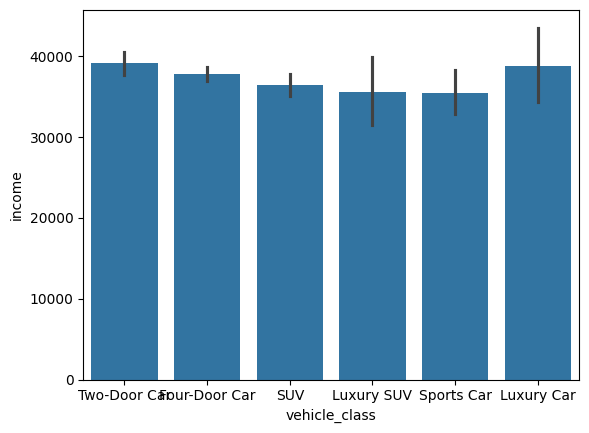

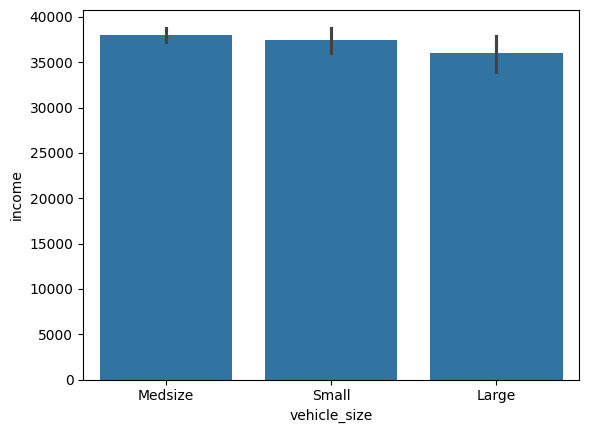

In [58]:
for col in categorical_variables:
    sns.barplot(data=customer_df, x=col, y="income")
    plt.show()

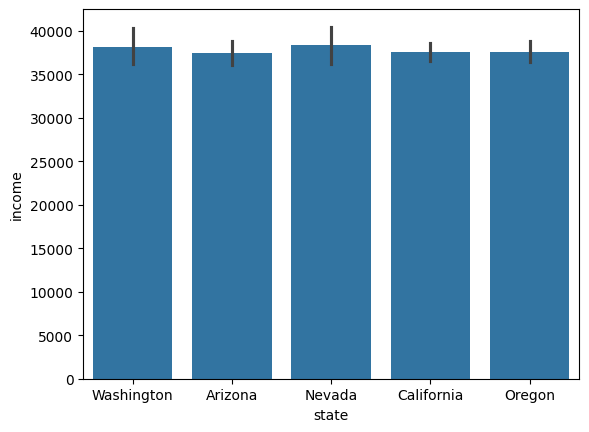

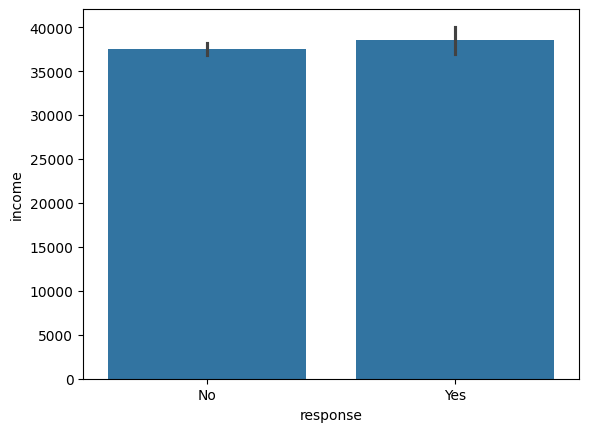

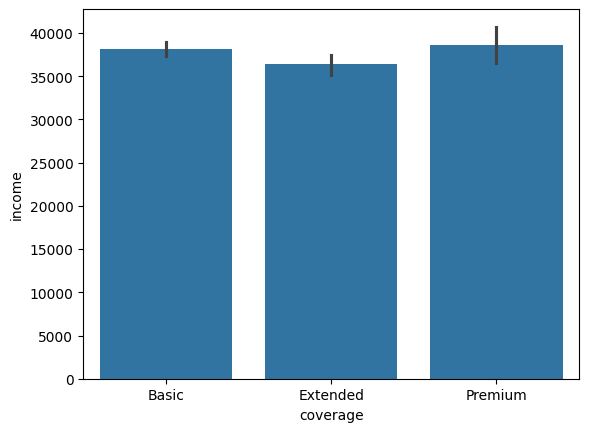

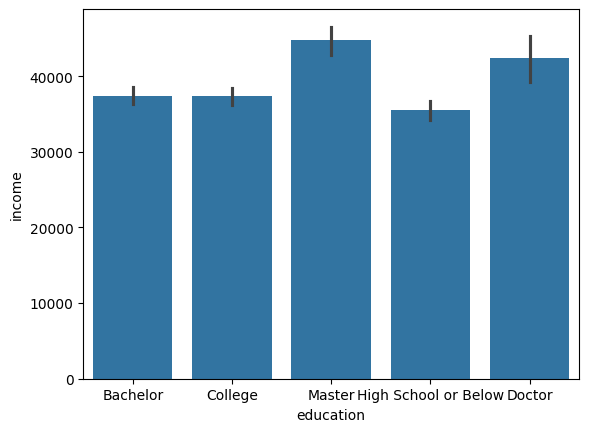

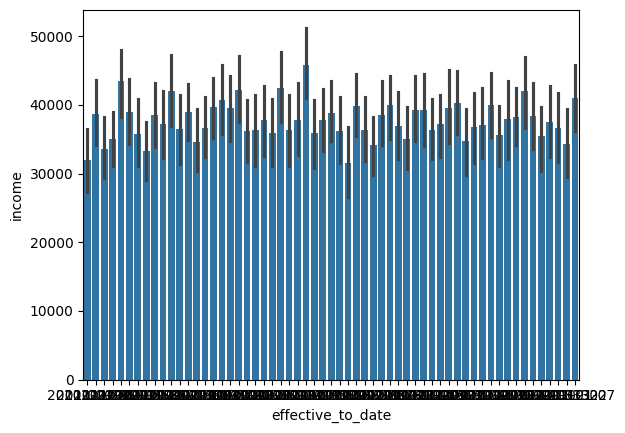

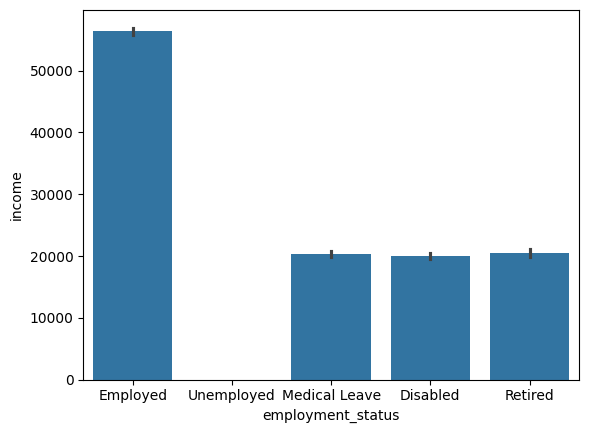

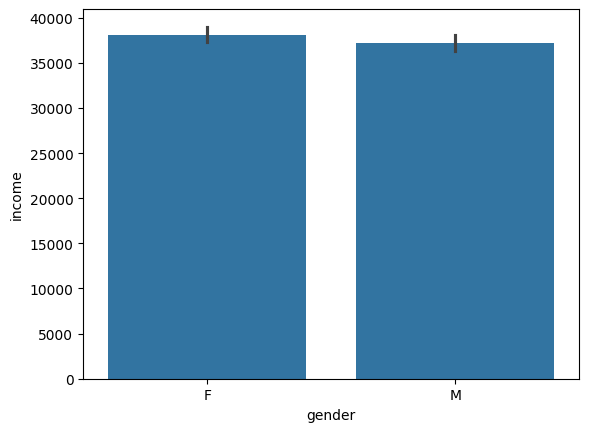

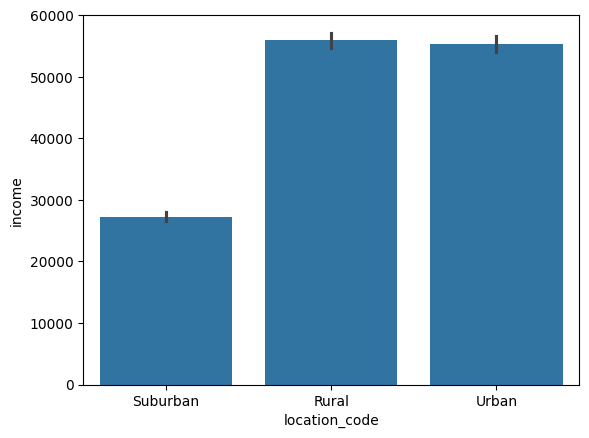

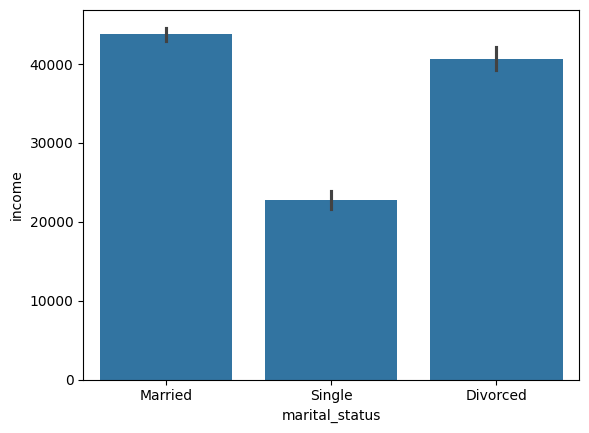

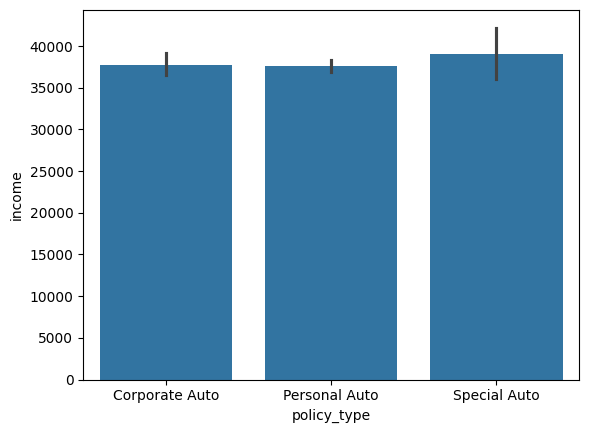

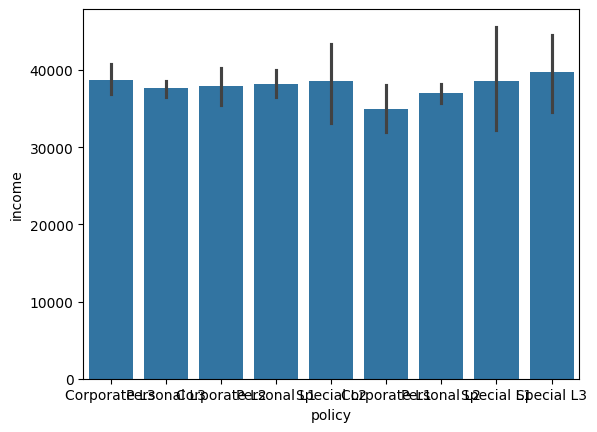

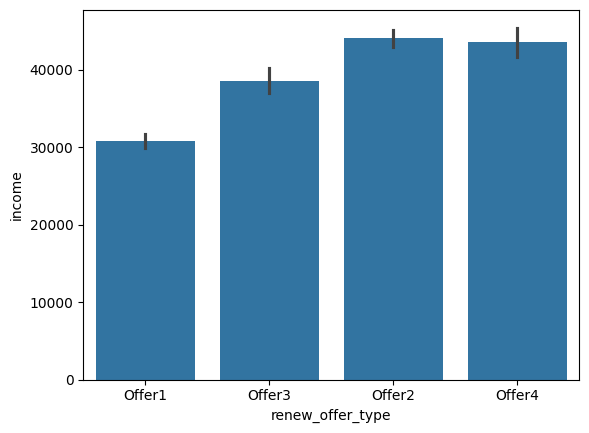

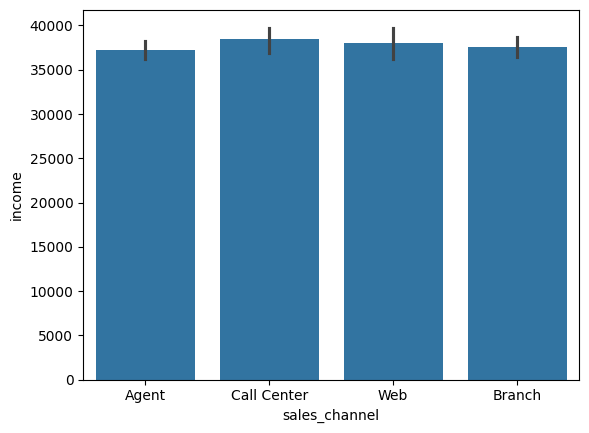

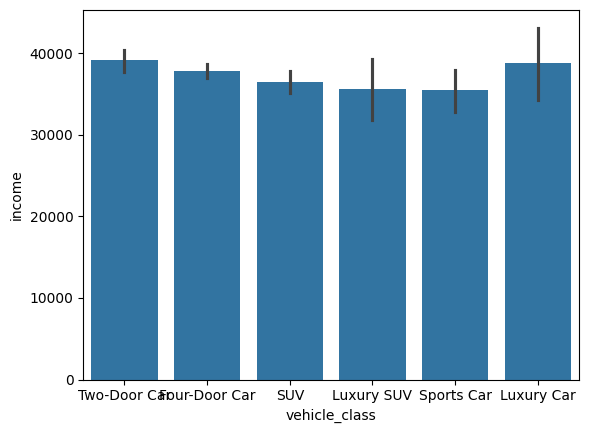

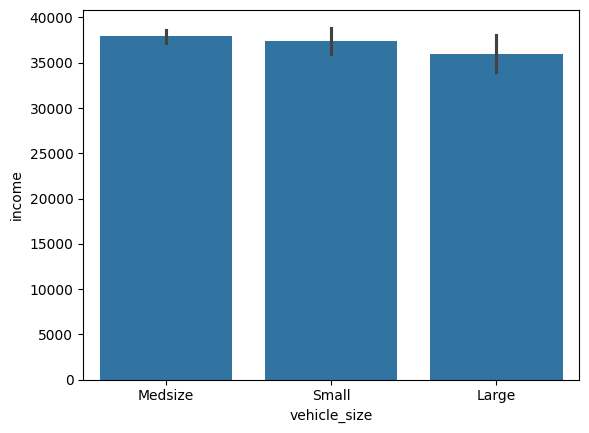

In [66]:
for col in categorical_variables:
    sns.barplot(data=customer_df, x=col, y="income")
    plt.show()

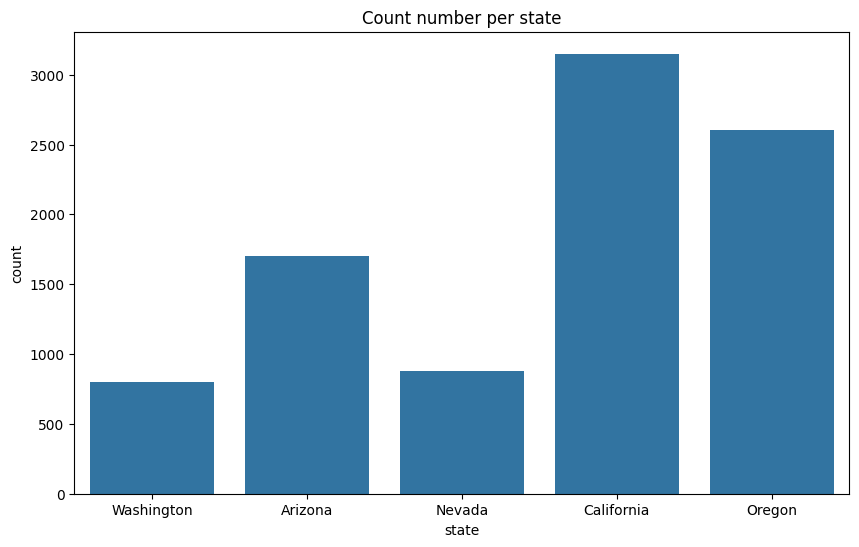

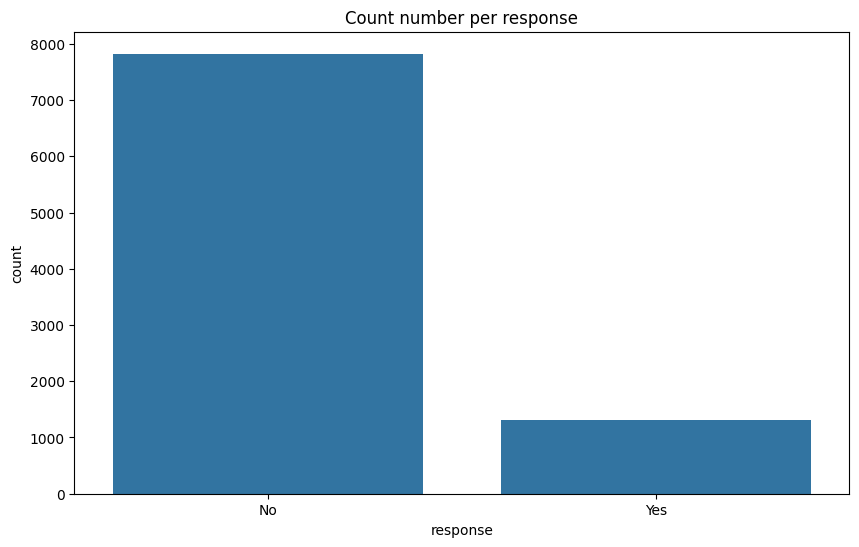

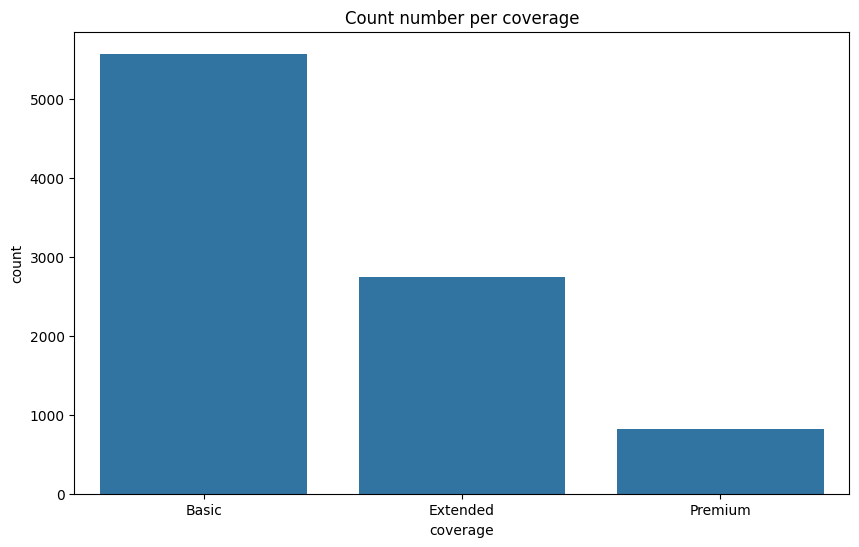

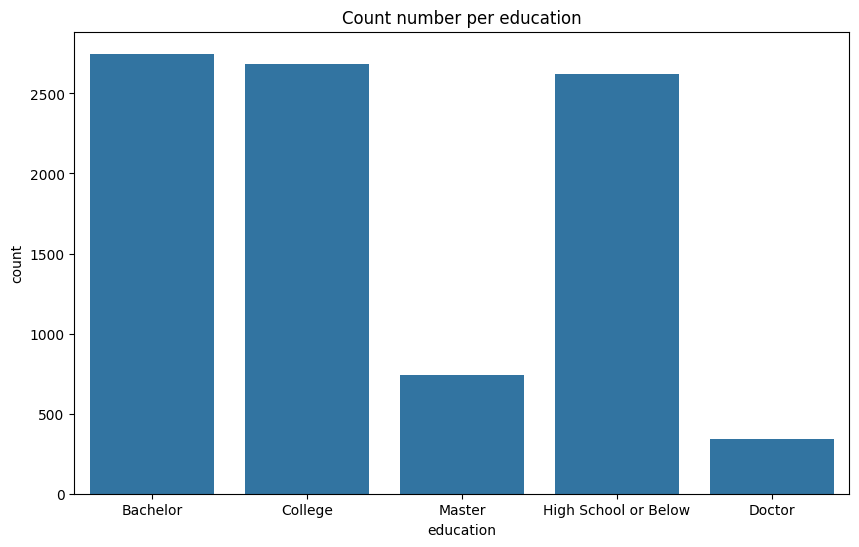

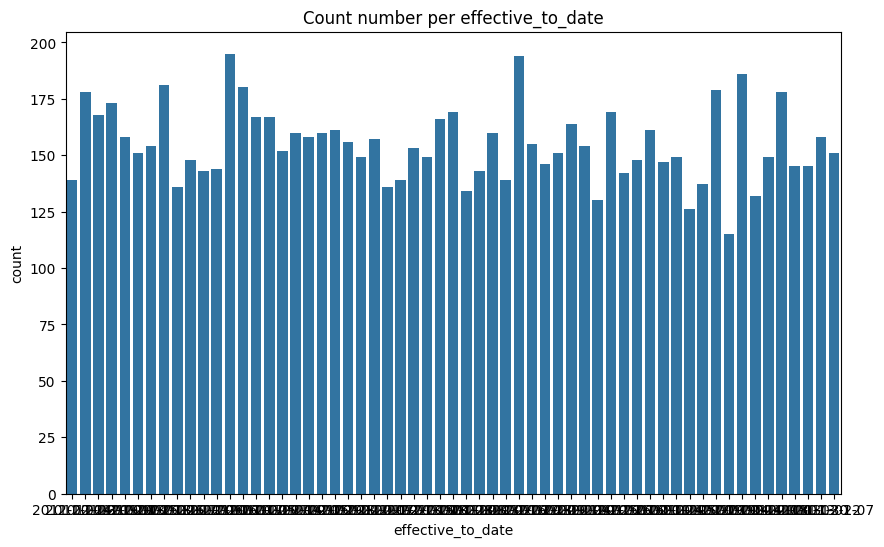

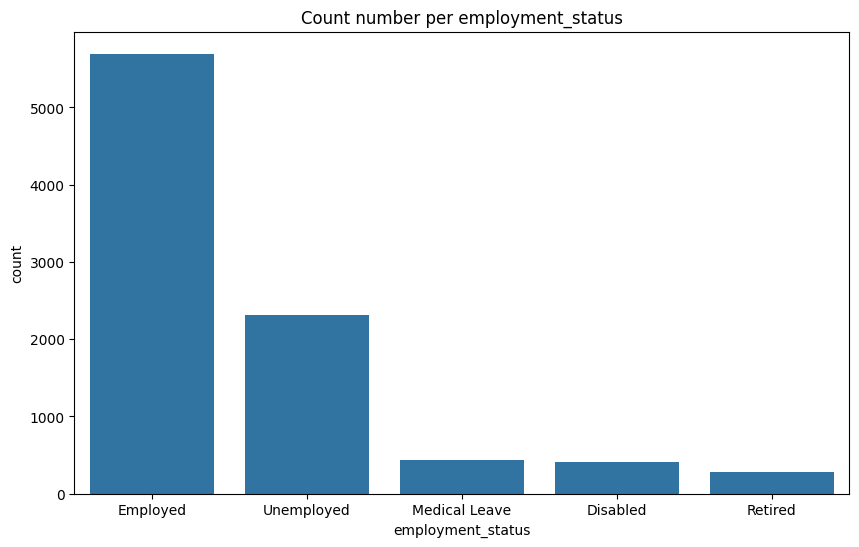

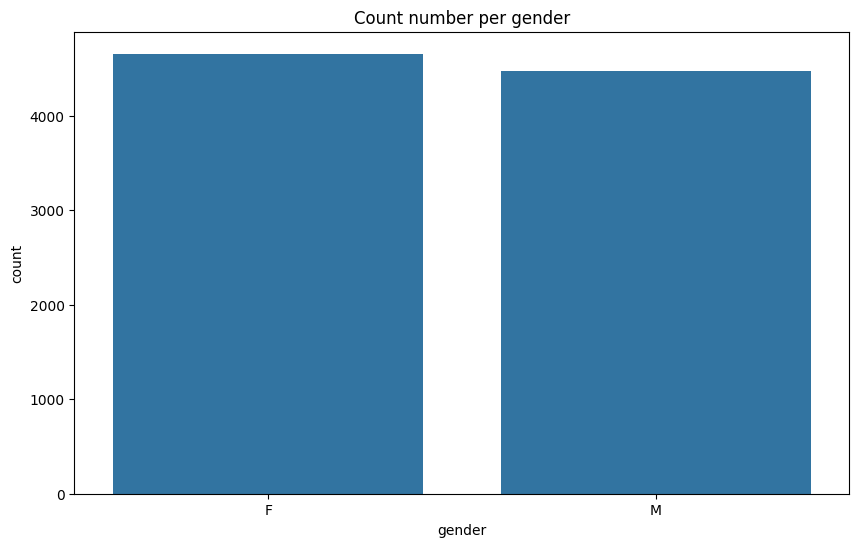

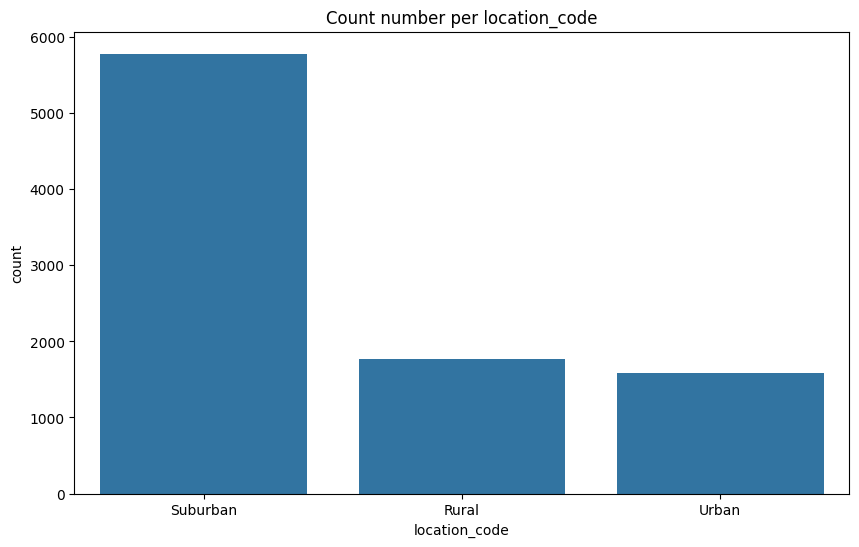

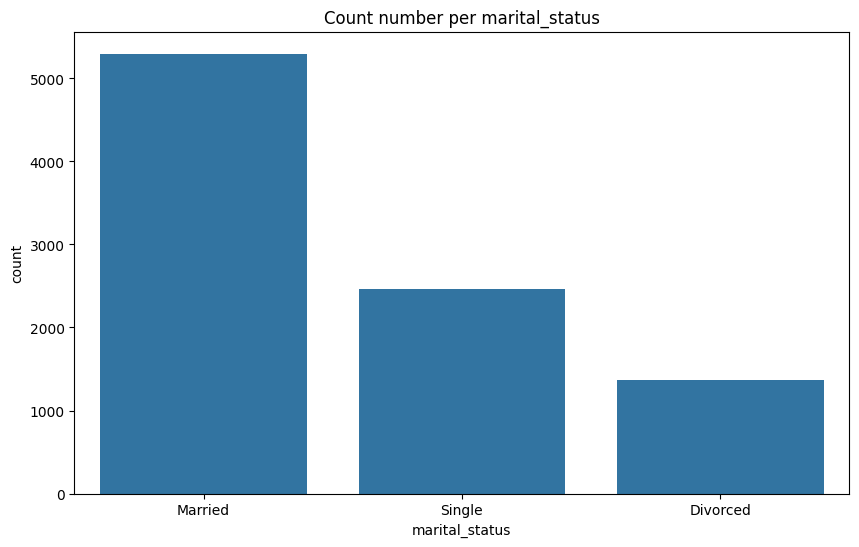

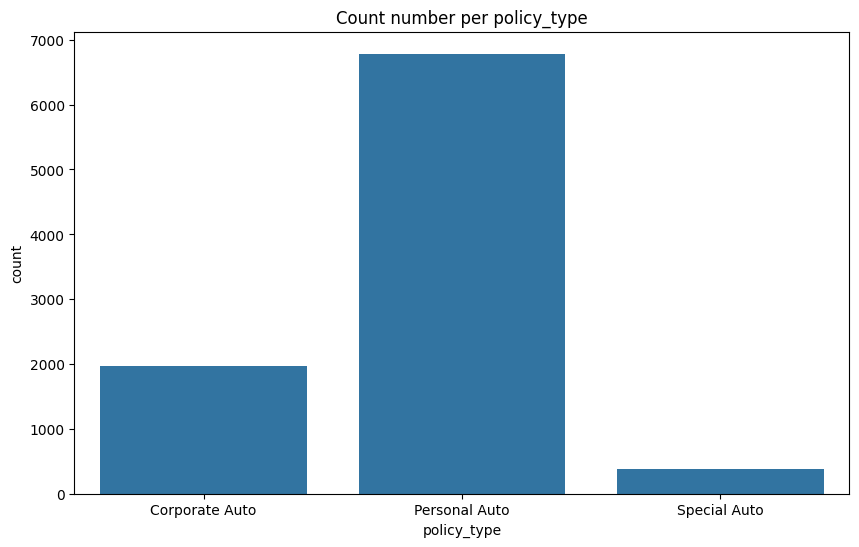

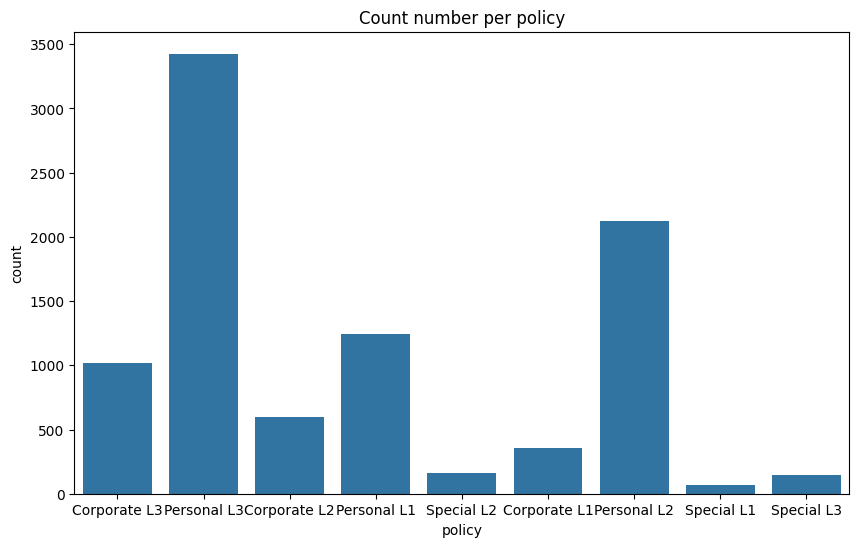

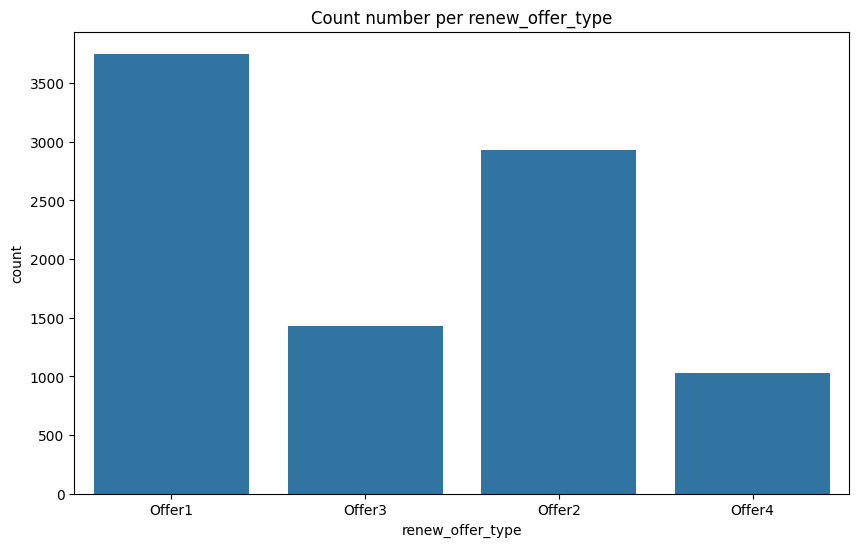

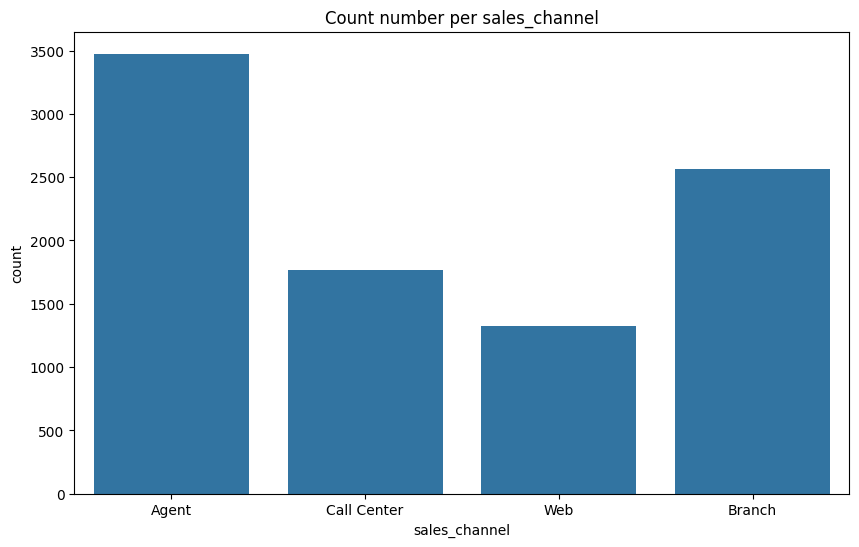

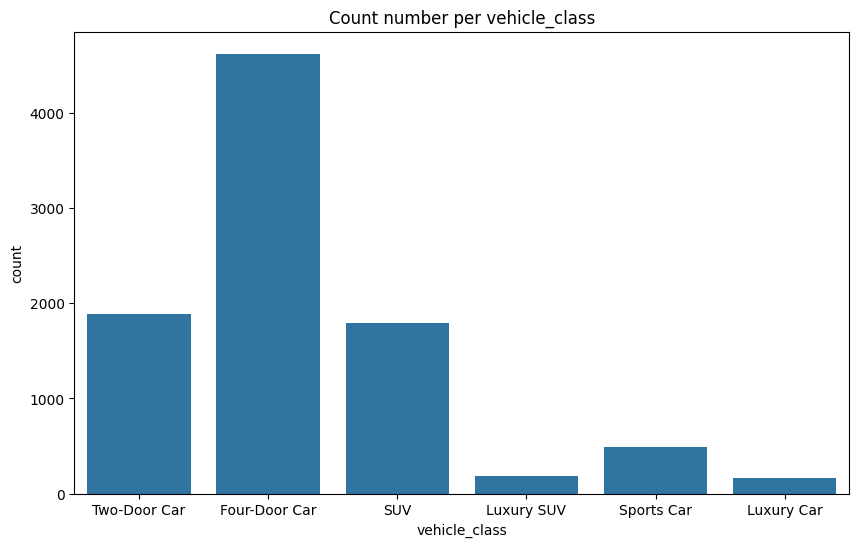

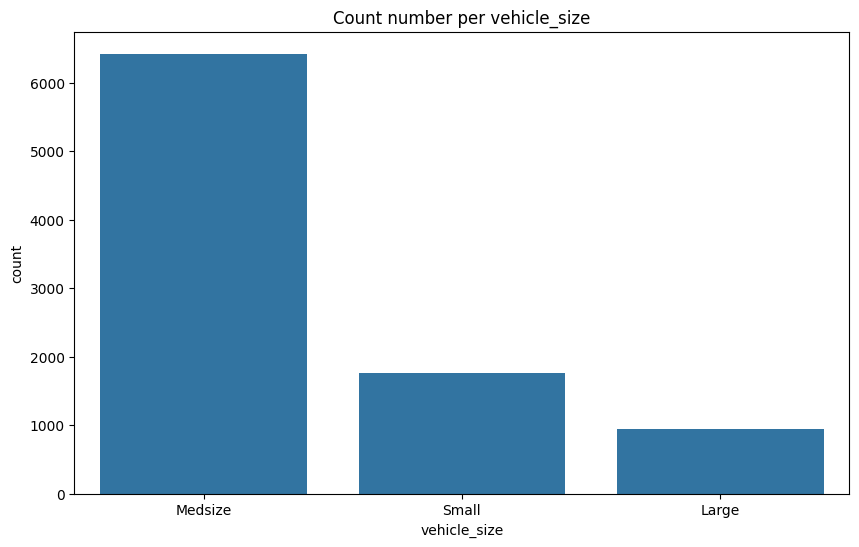

In [67]:
for col in categorical_variables:
    plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
    sns.countplot(data=customer_df, x=col)
    plt.title(f'Count number per {col}')
    plt.show()

In [ ]:
## Look for outliers in the continuous variables

In [70]:
continuous_variables 

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

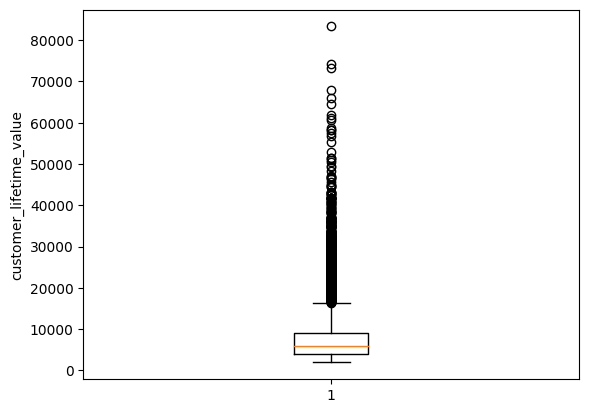

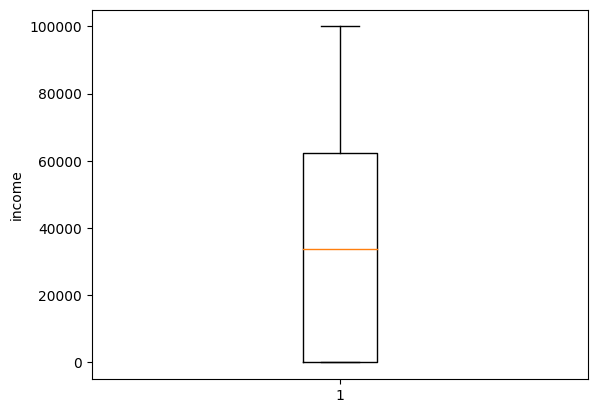

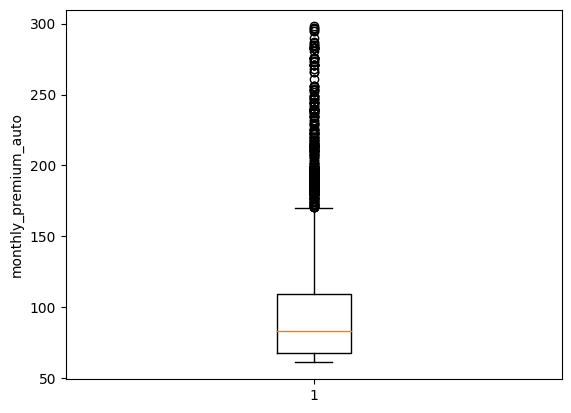

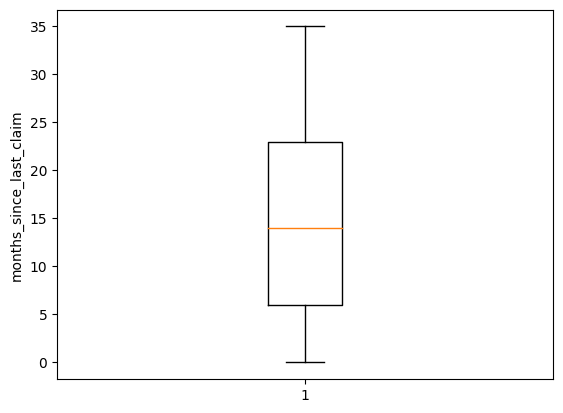

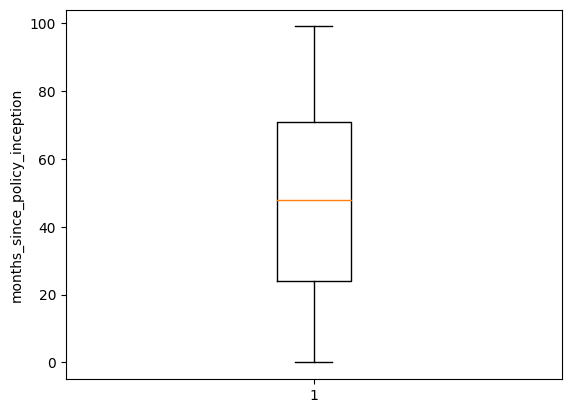

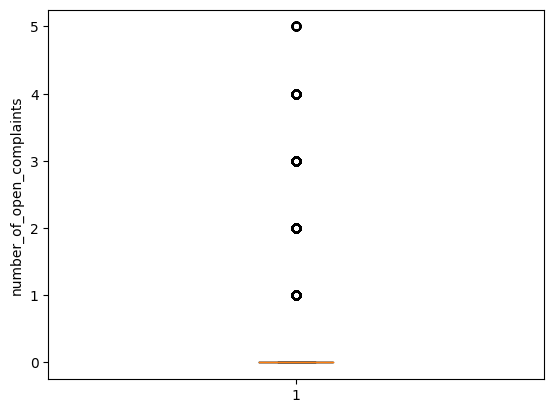

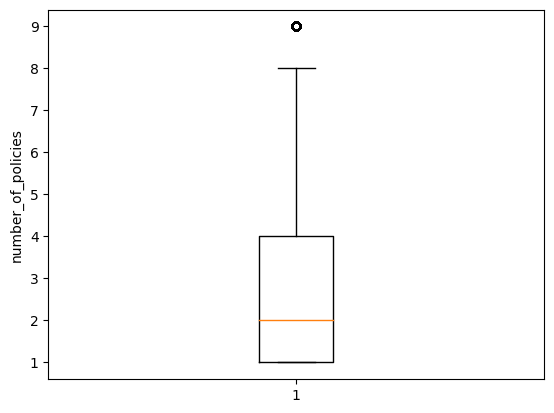

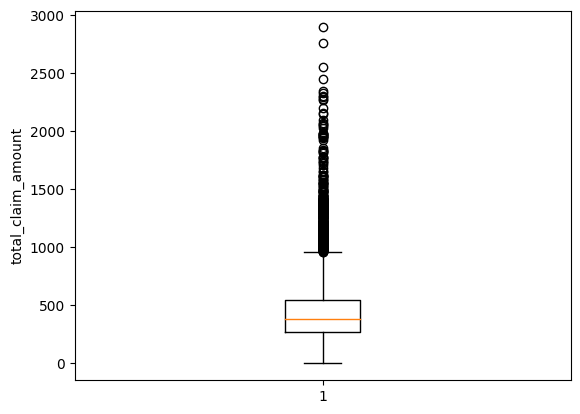

In [79]:
for col in continuous_variables:
    plt.boxplot(customer_df[col])  
    plt.ylabel(col)
    plt.show()

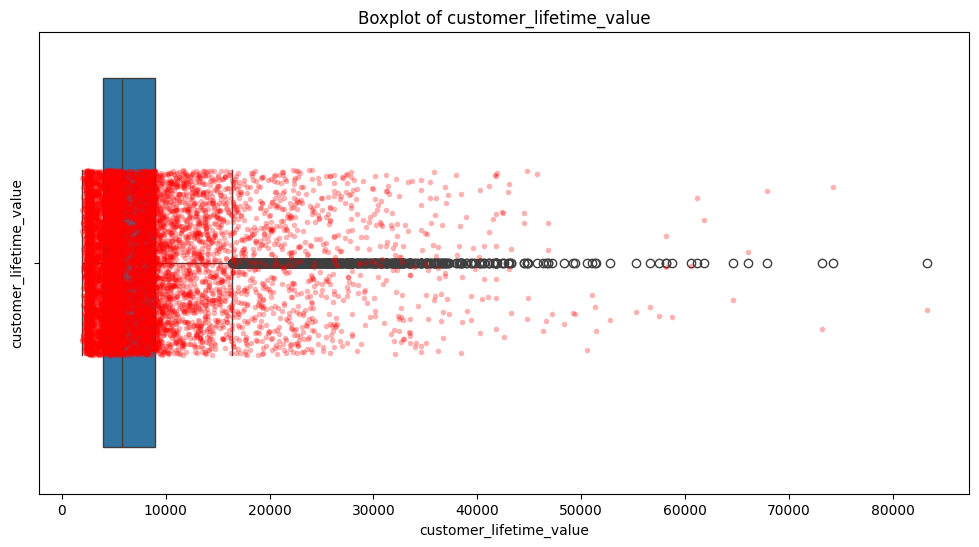

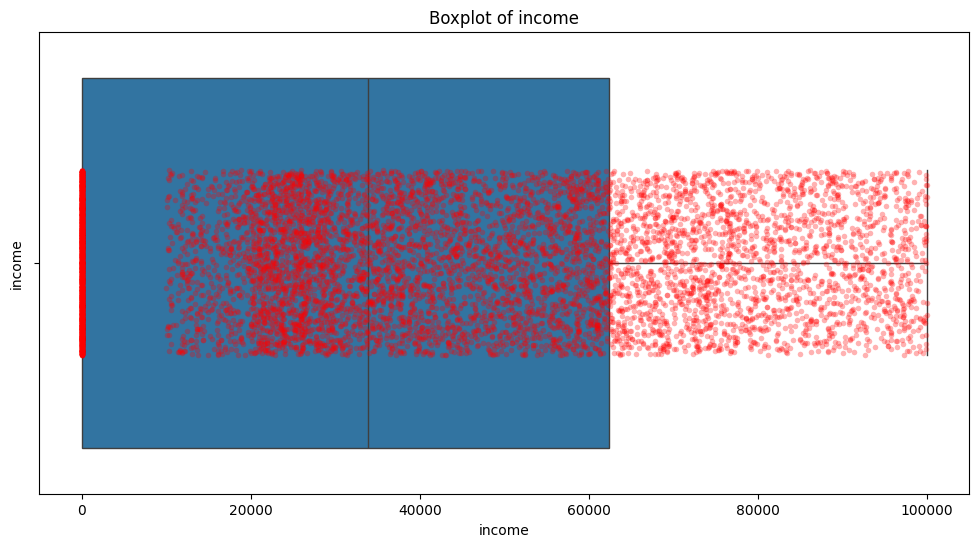

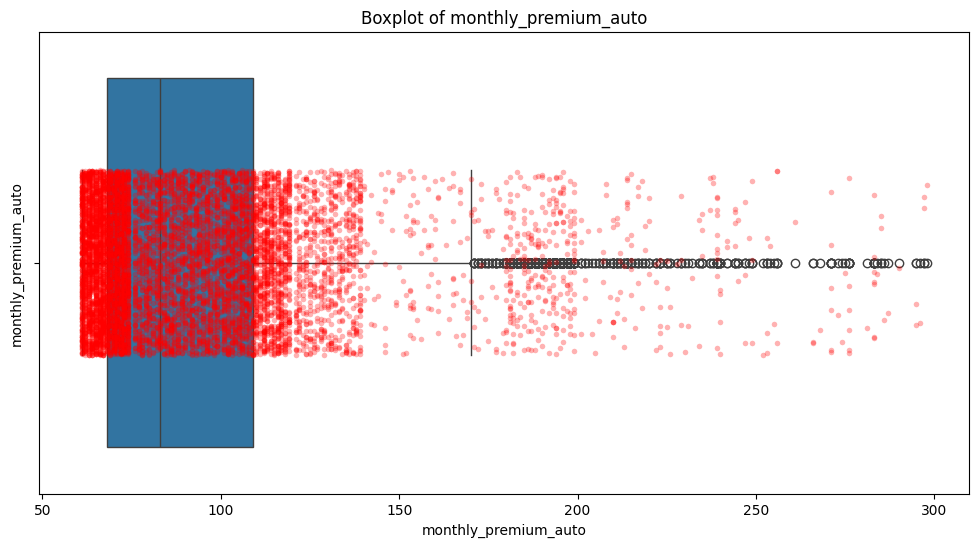

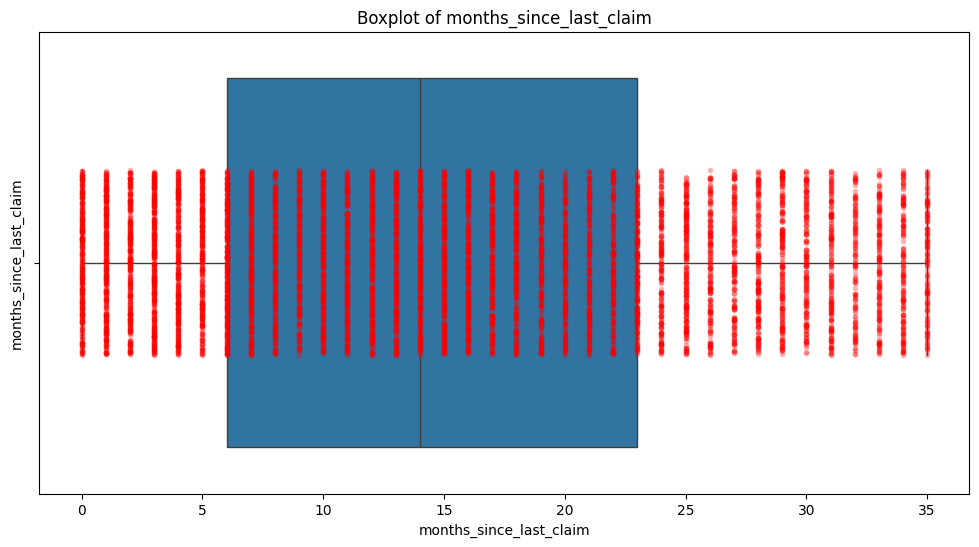

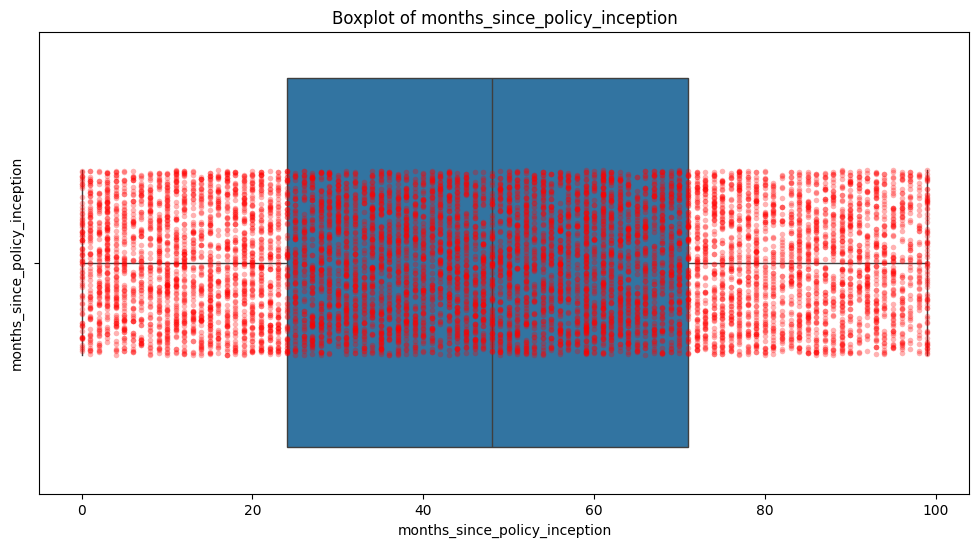

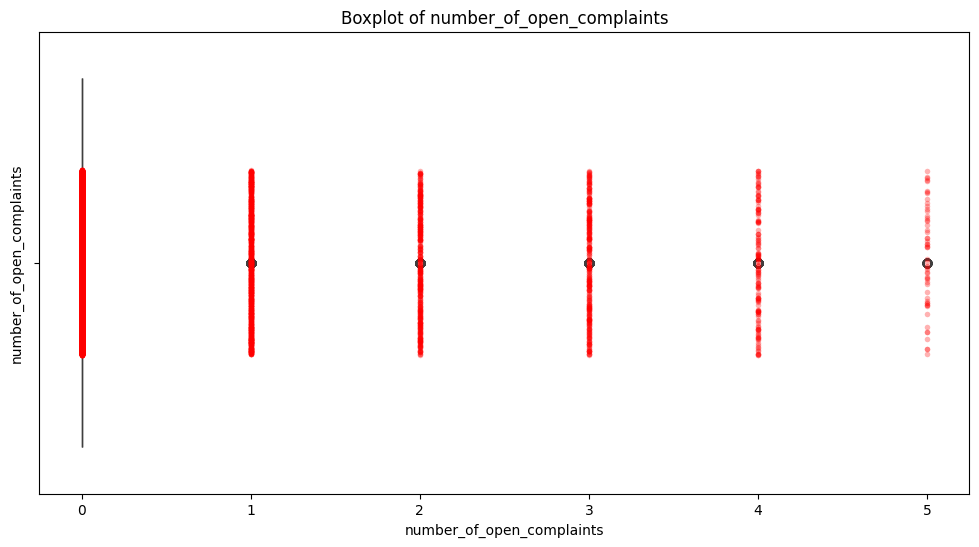

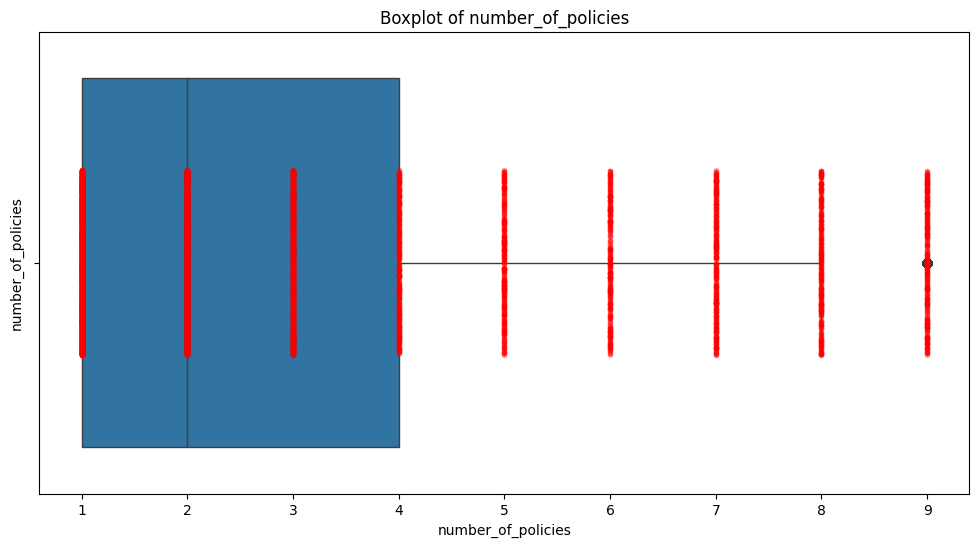

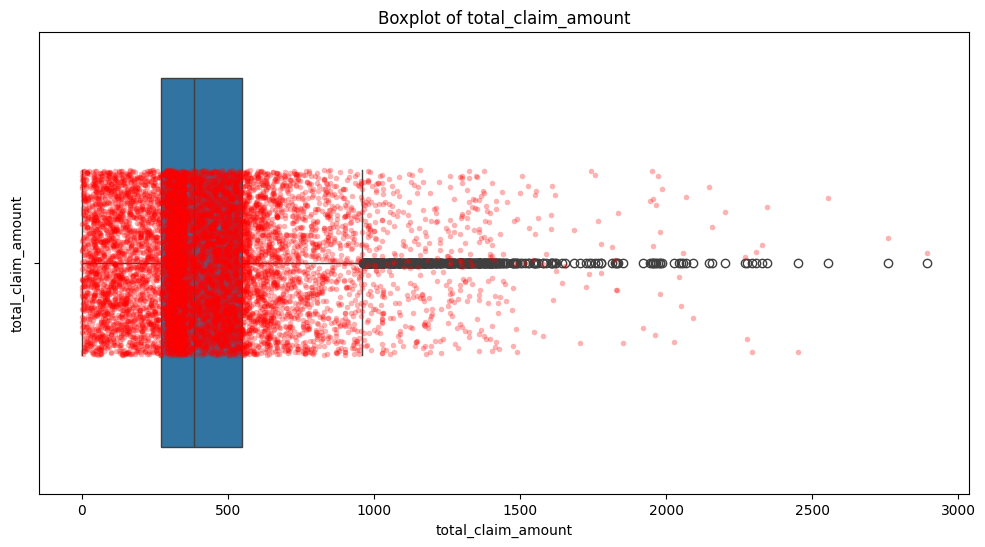

In [78]:
for col in continuous_variables:
    plt.figure(figsize=(12, 6))  # Optional: Adjust the figure size
    sns.boxplot(x=customer_df[col])
    sns.stripplot(x=customer_df[col], color='red', alpha=0.3, jitter=0.2, size=4)
    plt.title(f'Boxplot of {col}')
    plt.show()

## By combining boxplot and stripplot, you get a comprehensive view of the data distribution. The boxplot shows the summary statistics (median, quartiles, and outliers), 
## while the stripplot provides a detailed view of individual data points, helping to identify patterns and distributions within each category.
    ## Features Explanation:
    ## jitter=0.2: Adds a small amount of horizontal noise to each data point to avoid overlap.
    ## color='red': Colors the data points red for better visibility.
    ## alpha=0.3: Sets the transparency to 30%, making overlapping points more distinguishable.
    ## size=4: Sets the size of the data points to 4.


In [82]:
## Check all columns for NaN values

customer_df[customer_df.isna().any(axis=1)]   ## We confirm that there are no nan values. No action is required regarding missing data, allowing for straightforward analysis and modeling without the need for imputation or removal of missing values.

Empty DataFrame
Columns: [state, customer_lifetime_value, response, coverage, education, effective_to_date, employment_status, gender, income, location_code, marital_status, monthly_premium_auto, months_since_last_claim, months_since_policy_inception, number_of_open_complaints, number_of_policies, policy_type, policy, renew_offer_type, sales_channel, total_claim_amount, vehicle_class, vehicle_size]
Index: []

[0 rows x 23 columns]

In [83]:
## Check all columns for NaN values

customer_df.isna().sum()   ## We confirm that there are no nan values. No action is required regarding missing data, allowing for straightforward analysis and modeling without the need for imputation or removal of missing values.

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [85]:
customer_df.info()   ## The information below also shows that every column (features) have the same number 9134 of Non-Null Count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employment_status              9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premium_a